In [1]:
n_sigma_cut = 0.5 # main force for the PID

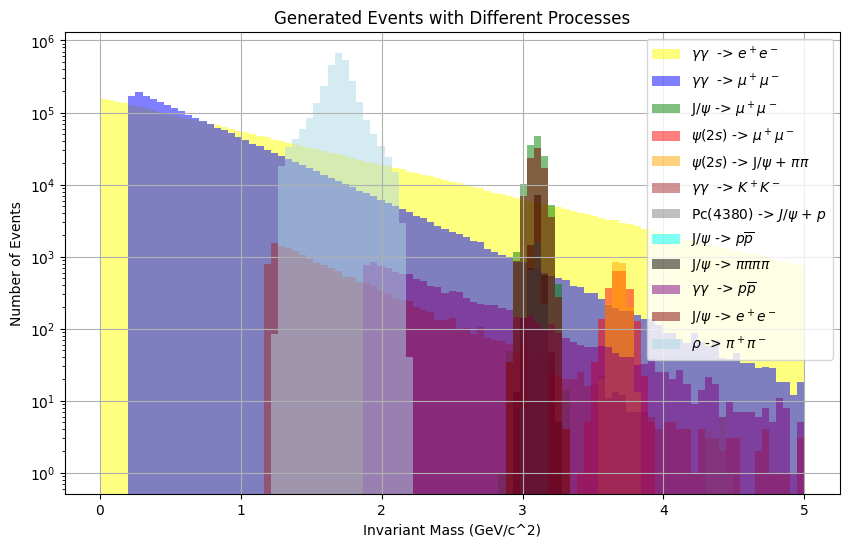

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Event generation parameters
n_photon_photon = 2144429
n_jpsi = 124800
n_psi2S_muons = 2320
n_psi2S_jpsi_pions = 2120
n_pq1 = 14
#n_pq2 = 25
n_pp_kaon = 16920
n_jpsi_protons = 2440
n_jpsi_4pi = 9470
#n_jpsi_3pi = 500
n_photon_photon_proton = 10840 
n_photon_photon_electron = 2971120
n_jpsi_electrons = 84640 #Run 3 & 4
n_rhoprime = 2886800

# Constants (GeV/c^2)
m_muon = 0.105658  # Muon mass
m_jpsi = 3.0969    # J/psi mass
m_psi2S = 3.6861   # Psi(2S) mass
m_pion = 0.13957   # Charged pion mass
m_proton= .938 
m_pentaquark= 4.38
m_electron= .0005
m_kaon= 0.49367
m_rho = 0.775
m_rho_prime = 1.465
m_rho_1700 = 1.7 

def isotropic_two_body_decay(mother_mass, daughter_mass1, daughter_mass2):
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    p = tpc_momentum_resolution(p)
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution(momentum):
    a = 0.005
    b = 0.01
    resolution = np.sqrt(a**2 + (b * momentum)**2)
    smeared_momentum = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum

def generate_photon_photon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_muon  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(mass, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, E1, E2 = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#NEW Rho Prime-------------------

def breit_wigner(m0, gamma, size=1):
    return m0 + 0.5 * gamma * np.tan(np.pi * (np.random.rand(size) - 0.5))

def relativistic_breit_wigner(m0, gamma, size=1):
    """
    Sample using relativistic Breit-Wigner:
    P(m) ∝ 1 / [(m^2 - m0^2)^2 + (m0 * gamma)^2]
    """
    m = np.zeros(size)
    for i in range(size):
        accepted = False
        while not accepted:
            # Sample uniformly in a window around the peak
            m_candidate = np.random.uniform(m0 - 3*gamma, m0 + 3*gamma)
            
            bw = 1.0 / ((m_candidate**2 - m0**2)**2 + (m0 * gamma)**2)
            bw_max = 1.0 / ((0)**2 + (m0 * gamma)**2)  # peak
            
            if np.random.rand() < bw / bw_max:
                m[i] = m_candidate
                accepted = True
    return m

def generate_rhoprime_events(n_events, m=1.7, gamma=0.140):
    events = []
    for _ in range(n_events):
        masses_rho_prime = relativistic_breit_wigner(m, gamma, size=1)[0]
        if masses_rho_prime < 2 * m_pion:
            continue
        pion1_p, pion2_p, E1, E2 = isotropic_two_body_decay(masses_rho_prime, m_pion, m_pion)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        events.append([pion1_p, pion2_p])
        # events.append(mass)
    return np.array(events)

def generate_psi2S_muons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(m_psi2S, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_psi2S_jpsi_pions_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        jpsi_p, pion_p, jpsi_E, pion_E = isotropic_two_body_decay(m_psi2S, m_jpsi, 2 * m_pion)
        muon1_p, muon2_p, muon1_E, muon2_E = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # jpsi_p = tpc_momentum_resolution(np.linalg.norm(jpsi_p))
        # pion_p = tpc_momentum_resolution(np.linalg.norm(pion_p))
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        smearedTracks.append(pion_p)
        smearedTracks.append(pion_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_protons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        proton1_p, proton2_p, _, _ = isotropic_two_body_decay(m_jpsi, m_proton, m_proton)
        # proton1_p = tpc_momentum_resolution(np.linalg.norm(proton1_p))
        # proton2_p = tpc_momentum_resolution(np.linalg.norm(proton2_p))
        smearedTracks.append(proton1_p)
        smearedTracks.append(proton2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)
#generate_jpsi_protons_events(n_events)

#NEW jpsi->ee
def generate_jpsi_electrons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        electron1_p, electron2_p, _, _ = isotropic_two_body_decay(m_jpsi, m_electron, m_electron)
        # proton1_p = tpc_momentum_resolution(np.linalg.norm(proton1_p))
        # proton2_p = tpc_momentum_resolution(np.linalg.norm(proton2_p))
        smearedTracks.append(electron1_p)
        smearedTracks.append(electron2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_pp_kaon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_kaon + 0.2 # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        pp_kaon1_p, pp_kaon2_p, _, _ = isotropic_two_body_decay(mass, m_kaon, m_kaon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(pp_kaon1_p)
        smearedTracks.append(pp_kaon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#-----------New gamma + gamma -> proton + proton

def generate_photon_photon_proton_events(n_events):
    masses = np.random.exponential(0.595, n_events) + 2 * m_proton  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        proton1_p, proton2_p, _, _ = isotropic_two_body_decay(mass, m_proton, m_proton)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(proton1_p)
        smearedTracks.append(proton2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#-----------New gamma + gamma -> electrons

def generate_photon_photon_electron_events(n_events):
    masses = np.random.exponential(0.925, n_events) + 2 * m_electron  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        electron1_p, electron2_p, _, _ = isotropic_two_body_decay(mass, m_electron, m_electron)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(electron1_p)
        smearedTracks.append(electron2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def isotropic_three_body_decay(mother_mass, daughter_mass1, daughter_mass2, daughter_mass3):
    """
    Simulates an isotropic three-body decay, distributing energy and momentum according to phase space constraints.
    Returns the momenta and energies of the three daughter particles.
    """
    # Total energy available for distribution after accounting for minimum required energy
    total_energy_available = (mother_mass - daughter_mass1 - daughter_mass2 - daughter_mass3)
    
    if total_energy_available <= 0:
        raise ValueError("Insufficient mass for a three-body decay.")

    # Randomly divide the available energy between the three daughters
    available_energy1 = np.random.uniform(0, total_energy_available)
    available_energy2 = np.random.uniform(0, total_energy_available - available_energy1)
    available_energy3 = total_energy_available - available_energy1 - available_energy2
    
    E1 = daughter_mass1 + available_energy1
    E2 = daughter_mass2 + available_energy2
    E3 = daughter_mass3 + available_energy3

    # Compute the momenta from the energies
    p1 = np.sqrt(E1**2 - daughter_mass1**2)
    p2 = np.sqrt(E2**2 - daughter_mass2**2)
    p3 = np.sqrt(E3**2 - daughter_mass3**2)
    
    # Random angles for isotropic decay
    theta1 = np.arccos(2 * np.random.rand() - 1)
    phi1 = 2 * np.pi * np.random.rand()
    
    theta2 = np.arccos(2 * np.random.rand() - 1)
    phi2 = 2 * np.pi * np.random.rand()
    
    # Calculate the momenta in 3D (isotropic decay)
    p1_vec = np.array([p1 * np.sin(theta1) * np.cos(phi1), p1 * np.sin(theta1) * np.sin(phi1), p1 * np.cos(theta1)])
    p2_vec = np.array([p2 * np.sin(theta2) * np.cos(phi2), p2 * np.sin(theta2) * np.sin(phi2), p2 * np.cos(theta2)])
    p3_vec = -p1_vec - p2_vec  # Momentum conservation
    
    return p1_vec, p2_vec, p3_vec, E1, E2, E3


def boost_to_lab_frame(momentum, boost_vector):
    """
    Boosts the momentum of a particle to the lab frame using the boost vector.
    """
    # Check if the boost vector is effectively zero (no boost needed)
    if np.linalg.norm(boost_vector) < 1e-10:
        print("error1")
        return momentum
    
    beta = boost_vector / np.linalg.norm(boost_vector)
    beta_norm_sq = np.linalg.norm(beta)**2
    
    # Ensure that beta_norm_sq < 1 (speed of light constraint)
    if beta_norm_sq >= 1.0:
        print("error2")
        return momentum  # No valid boost
    
    gamma = 1.0 / np.sqrt(1 - beta_norm_sq)
    dot_product = np.dot(momentum, beta)
    energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
    
    boosted_energy = gamma * (energy + dot_product)
    boosted_momentum = momentum + (gamma - 1) * dot_product / beta_norm_sq * beta + gamma * energy * beta
    
    return boosted_momentum

def boost_along_axis(momentum, beta, axis):
    """
    Boosts a particle along a single axis.
    
    Parameters:
    - momentum: 3D momentum vector of the particle to be boosted
    - beta: velocity (as a fraction of the speed of light) along the chosen axis
    - axis: axis along which to boost ('x', 'y', or 'z')
    
    Returns:
    - boosted_momentum: the 3D momentum vector after the boost along the given axis
    """
    if abs(beta) >= 1:
        print("error2")
        raise ValueError("Beta must be less than 1 for a valid boost.")
    
    gamma = 1.0 / np.sqrt(1 - beta**2)
    
    # Boost along the x-axis
    if axis == 'x':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_px = gamma * (momentum[0] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[0])
        boosted_momentum = np.array([boosted_px, momentum[1], momentum[2]])
    
    # Boost along the y-axis
    elif axis == 'y':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_py = gamma * (momentum[1] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[1])
        boosted_momentum = np.array([momentum[0], boosted_py, momentum[2]])
    
    # Boost along the z-axis
    elif axis == 'z':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_pz = gamma * (momentum[2] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[2])
        boosted_momentum = np.array([momentum[0], momentum[1], boosted_pz])
    
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")
    
    return boosted_momentum, boosted_energy

def boost_to_lab_frame_separate(momentum, boost_vector):
    """
    Boosts the particle's 3D momentum vector using separate boosts along the x, y, and z axes.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - boost_vector: 3D velocity vector (as a fraction of the speed of light)
    
    Returns:
    - boosted_momentum: the 3D momentum vector after boosting along x, y, and z
    """
    boosted_momentum = momentum
    # Boost along x
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[0], 'x')
    # Boost along y
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[1], 'y')
    # Boost along z
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[2], 'z')
    
    px, py, pz = boosted_momentum
    p_total = np.sqrt(px**2 + py**2 + pz**2)
    
    # Calculate new theta (polar angle)
    theta_prime = np.arccos(pz / p_total) if p_total > 0 else 0.0
    
    # Calculate new phi (azimuthal angle)
    phi_prime = np.arctan2(py, px)

    return boosted_momentum, theta_prime, phi_prime


def generate_psi2S_jpsi_pions_events_fixed(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        
        # Boost the muons back to the lab frame using the momentum of the J/psi from Step 1
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        smearedTracks.append(muon1_p_lab)
        smearedTracks.append(muon2_p_lab)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

def isotropic_two_body_decay_no_smearing(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay without smearing.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution_3d(momentum_vec):
    """
    Applies TPC momentum resolution smearing to each component of the momentum vector.
    """
    smeared_momentum_vec = np.zeros(3)
    for i in range(3):
        momentum = momentum_vec[i]
        a = 0.005
        b = 0.01
        resolution = np.sqrt(a**2 + (b * momentum)**2)
        smeared_momentum_vec[i] = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum_vec

def generate_psi2S_jpsi_pions_events_smearing_after_boost(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (without smearing)
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay_no_smearing(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        # Step 4: Apply smearing to the muons after boosting to the lab frame (component-wise)
        muon1_p_lab_smeared = tpc_momentum_resolution_3d(muon1_p_lab)
        muon2_p_lab_smeared = tpc_momentum_resolution_3d(muon2_p_lab)
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

# def plot_event_distribution(events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions, events_jpsi_protons, events_pp_kaons, events_pq):
#     plt.figure(figsize=(10, 6))
#     bins = np.linspace(0, 5, 100)
#     plt.hist(events_photon_photon, bins, alpha=0.5, label='Photon+Photon -> 2 muons', color='blue')
#     plt.hist(events_jpsi, bins, alpha=0.5, label='J/psi -> 2 muons', color='green')
#     plt.hist(events_psi2S_muons, bins, alpha=0.5, label='psi(2S) -> 2 muons', color='red')
#     plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label='psi(2S) -> J/psi + 2 pions', color='orange')
#     plt.hist(events_jpsi_protons, bins, alpha=0.5, label='J/psi -> 2 protons', color='cyan')
#     plt.hist(events_pp_kaons, bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='brown')
#     plt.hist(events_pq, bins, alpha=0.5, label='pentaquark(2S) -> J/psi + 1 proton', color='gray')
#     plt.xlabel('Invariant Mass (GeV/c^2)')
#     plt.yscale('log')  # Log scale for y-axis
#     plt.ylabel('Number of Events')
#     plt.title('Generated Events with Different Processes')
#     plt.legend(loc='upper right')
#     plt.grid(True)
#     plt.show()

def plot_event_distribution(events_photon_photon_electron, events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions, events_jpsi_protons, events_pp_kaons, events_pq, events_jpsi_4pions, events_photon_photon_proton, events_jpsi_electrons, events_rhoprime):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_photon_photon_electron, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $e^+ e^-$', color='yellow')
    plt.hist(events_photon_photon, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $\mu^+ \mu^-$', color='blue')
    plt.hist(events_jpsi, bins, alpha=0.5, label=r'J/$\psi$ -> $\mu^+ \mu^-$', color='green')
    plt.hist(events_psi2S_muons, bins, alpha=0.5, label=r'$\psi(2s)$ -> $\mu^+ \mu^-$', color='red')
    plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label=r'$\psi(2s)$ -> J/$\psi$ + $\pi \pi$', color='orange')
    plt.hist(events_pp_kaons, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $K^+ K^-$', color='brown')
    plt.hist(events_pq, bins, alpha=0.5, label=r'Pc(4380) -> $J/ \psi$ + $p$', color='gray')
    plt.hist(events_jpsi_protons, bins, alpha=0.5, label=r'J/$\psi$ -> $p \overline{p}$', color='cyan')
    plt.hist(events_jpsi_4pions, bins, alpha=0.5, label=r'J/$\psi$ -> $\pi \pi \pi \pi$', color='black')
    plt.hist(events_photon_photon_proton, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $p \overline{p}$', color='purple')
    plt.hist(events_jpsi_electrons, bins, alpha=0.5, label=r'J/$\psi$ -> $e^+ e^-$', color='maroon')
    plt.hist(events_rhoprime, bins, alpha=0.5, label=r'$\rho$ -> $\pi^+ \pi^-$', color='lightblue')

    #plt.hist(events_jpsi_rho, bins, alpha=0.5, label='J/psi -> 2 rho', color='purple')
    #plt.hist(events_jpsi_3pions, bins, alpha=0.5, label='J/psi -> 3 pions', color='pink')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes')
    plt.legend(loc='upper right', fontsize = 10)
    plt.grid(True)
    plt.show()


#plt.rcParams.update({'font.size': 15})

def plot_event_distribution1(events_jpsi_4pions):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_jpsi_4pions, bins, alpha=0.5, label='J/psi -> 4 pions', color='black')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


def compute_invariant_mass(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_muon  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_kaon(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_kaon  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_proton(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_proton  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_electron(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_electron  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_pion(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_pion  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_masses_for_events_jpsi_proton(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_proton(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_kaon(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_kaon(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_pion(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_pion(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_electron(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_electron(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events(events):
    """
    Computes the invariant mass for a list of events, where each event contains a list of tracks.
    
    Parameters:
    - events: A list of events, where each event is a list of tracks.
              Each track is a dictionary containing:
              - 'momentum': a numpy array representing the 3-momentum of the track
              - 'mass': the mass of the particle
    
    Returns:
    - invariant_masses: A list of invariant masses, one for each event.
    """
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def isotropic_two_body_decay_with_angles(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay with angle saving (theta, phi).
    Returns momenta, energies, and angles.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    
    return p1, p2, E1, E2, theta, phi

def reconstruct_3d_momentum(smeared_p, theta, phi):
    """
    Reconstructs the 3D momentum components using the smeared momentum magnitude and saved angles (theta, phi).
    """
    px = smeared_p * np.sin(theta) * np.cos(phi)
    py = smeared_p * np.sin(theta) * np.sin(phi)
    pz = smeared_p * np.cos(theta)
    
    return np.array([px, py, pz])

def calculate_boost_vector(momentum, energy):
    """
    Calculates the velocity (beta) from the momentum and energy to be used as the boost vector.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - energy: total energy of the particle
    
    Returns:
    - beta: 3D velocity vector (beta = p / E)
    """
    beta = momentum / energy
    return beta

def generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        
        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(pion1_E)
        smearedTracks.append(pion2_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
    # return np.array(events)


def generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(proton_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(proton_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
#generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pentaquark)

# def generate_jpsi_four_pions(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

#         pion3_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
#         pion4_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion4_p_rest, boost_vector)
        
#         # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))
#         smeared_pion4_p = tpc_momentum_resolution(np.linalg.norm(pion4_p_lab))

        
#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_pion3_p, theta_prime, phi_prime) #<- correct
#         smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_pion4_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(smeared_pion3_p_lab)
#         smearedTracks.append(smeared_pion4_p_lab)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(pion2_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)
#         smearedTracks.append(pion2_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)
    
#     return events

def lorentz_boost(p_vec, mass, beta):
    """
    Boosts a particle's 4-vector from its rest frame to the lab frame using a Lorentz transformation.
    
    Parameters:
      p_vec: 3D numpy array of the particle's momentum in the rest frame.
      mass: Mass of the particle.
      beta: 3D numpy array representing the boost velocity vector (v/c). Its norm must be less than 1.
    
    Returns:
      E_prime: Boosted energy.
      p_prime: Boosted 3-momentum (numpy array).
    """
    beta2 = np.dot(beta, beta)
    if beta2 >= 1:
        raise ValueError("Beta must be less than 1.")
    gamma = 1.0 / np.sqrt(1 - beta2)
    # Energy in the particle's rest frame (before boost)
    E = np.sqrt(np.linalg.norm(p_vec)**2 + mass**2)
    p_dot_beta = np.dot(p_vec, beta)
    # Lorentz transformation for the time component
    E_prime = gamma * (E + p_dot_beta)
    # Lorentz transformation for the spatial part
    p_prime = p_vec + ((gamma - 1) * p_dot_beta / beta2 + gamma * E) * beta
    return E_prime, p_prime

def generate_jpsi_four_pions(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: J/ψ decays to ρ + 2 pions (three-body decay)
        # Here, the first daughter is interpreted as the ρ.
        # The decay returns: [rho momentum, pion1 momentum, pion2 momentum, rho energy, pion1 energy, pion2 energy]
        rho_p, pion1_p, pion2_p, rho_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
        # Step 2: ρ decays to two pions in its rest frame (with angles saved).
        # Here, we generate the two pions from the ρ decay in the ρ rest frame.
        pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost vector for the ρ.
        # Use the ρ's lab momentum and energy to get the velocity: beta = p/E.
        beta = rho_p / rho_E
        
        # Step 4: Boost the ρ decay products using the new Lorentz boost function.
        # This will naturally accelerate one pion (if its momentum is aligned with beta)
        # and decelerate the other (if anti-aligned).
        E3_lab, pion3_p_lab = lorentz_boost(pion3_p_rest, m_pion, beta)
        E4_lab, pion4_p_lab = lorentz_boost(pion4_p_rest, m_pion, beta)
        
        # Step 5: Optionally apply momentum smearing (if desired) to the boosted momenta.
        # Here we smear only the magnitude and then reconstruct the 3D vector with the same direction.
        p3_lab_mag = np.linalg.norm(pion3_p_lab)
        p4_lab_mag = np.linalg.norm(pion4_p_lab)
        smeared_p3_mag = tpc_momentum_resolution(p3_lab_mag)
        smeared_p4_mag = tpc_momentum_resolution(p4_lab_mag)
        
        # Obtain the angles from the boosted momentum
        theta3 = np.arccos(pion3_p_lab[2] / p3_lab_mag) if p3_lab_mag > 0 else 0.0
        phi3 = np.arctan2(pion3_p_lab[1], pion3_p_lab[0])
        theta4 = np.arccos(pion4_p_lab[2] / p4_lab_mag) if p4_lab_mag > 0 else 0.0
        phi4 = np.arctan2(pion4_p_lab[1], pion4_p_lab[0])
        
        # Reconstruct the smeared momentum vectors with the same directions.
        smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_p3_mag, theta3, phi3)
        smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_p4_mag, theta4, phi4)
        
        # Recalculate energies for the smeared momenta (using pion mass)
        E3_smeared = np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion**2)
        E4_smeared = np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion**2)
        
        # Step 6: Construct the final event.
        # Final state: the two pions from the ρ decay (smeared) and the two pions directly from the three-body decay.
        # Also, keep the energy values for invariant mass reconstruction.
        # The event list is organized as: [pion3_lab (smeared), pion4_lab (smeared), pion1 (from three-body), pion2 (from three-body),
        #                                 E3_smeared, E4_smeared, pion1_E, pion2_E]
        smearedTracks.extend([smeared_pion3_p_lab, smeared_pion4_p_lab, pion1_p, pion2_p,
                              E3_smeared, E4_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events

def generate_psi2S_jpsi_pions_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, pion1_p, pion2_p,
                              E1_smeared, E2_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events


def generate_pentaquark_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, proton_p,
                              E1_smeared, E2_smeared, proton_E])
        events.append(smearedTracks)
    
    return events


# def generate_jpsi_3pions_events(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         rho_p, pion1_p, rho_E, pion1_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion2_p_rest, pion3_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(rho_p, rho_E)

#         pion2_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion2_p_rest, boost_vector)
#         pion3_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
        
#         smeared_pion2_p = tpc_momentum_resolution(np.linalg.norm(pion2_p_lab))
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))

#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         pion2_p_lab_smeared = reconstruct_3d_momentum(smeared_pion2_p, theta_prime, phi_prime) #<- correct
#         pion3_p_lab_smeared = reconstruct_3d_momentum(smeared_pion3_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(pion2_p_lab_smeared)
#         smearedTracks.append(pion3_p_lab_smeared)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion2_p)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)

#     return events

def generate_jpsi_3pions_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: J/ψ -> ρ + π (two-body decay)
        # The first daughter is the ρ, the second is the "direct" pion.
        rho_p, pion_direct_p, rho_E, pion_direct_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
        # Step 2: ρ -> π + π in the ρ rest frame (with angles saved)
        pion1_p_rest, pion2_p_rest, _, _, theta, phi = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost for the ρ decay products using the ρ's four-momentum.
        # (Beta = p/E for the ρ.)
        beta = rho_p / rho_E
        
        # Use our dedicated Lorentz boost function to boost each pion from the ρ rest frame to the lab frame.
        E1_lab, pion1_p_lab = lorentz_boost(pion1_p_rest, m_pion, beta)
        E2_lab, pion2_p_lab = lorentz_boost(pion2_p_rest, m_pion, beta)
        
        # Step 4: (Optional) Apply momentum smearing to the boosted momenta.
        p1_lab_mag = np.linalg.norm(pion1_p_lab)
        p2_lab_mag = np.linalg.norm(pion2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)
        
        # Extract the original directions from the boosted momenta.
        theta1 = np.arccos(pion1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(pion1_p_lab[1], pion1_p_lab[0])
        theta2 = np.arccos(pion2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(pion2_p_lab[1], pion2_p_lab[0])
        
        # Reconstruct the smeared momentum vectors.
        smeared_pion1_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_pion2_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)
        
        # Recalculate the energies for these pions.
        E1_smeared = np.sqrt(np.linalg.norm(smeared_pion1_lab)**2 + m_pion**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_pion2_lab)**2 + m_pion**2)
        
        # Step 5: Process the direct pion.
        # Optionally, you can smear its momentum as well.
        p_direct = np.linalg.norm(pion_direct_p)
        smeared_direct = tpc_momentum_resolution(p_direct)
        theta_direct = np.arccos(pion_direct_p[2] / p_direct) if p_direct > 0 else 0.0
        phi_direct = np.arctan2(pion_direct_p[1], pion_direct_p[0])
        smeared_pion_direct = reconstruct_3d_momentum(smeared_direct, theta_direct, phi_direct)
        E_direct_smeared = np.sqrt(np.linalg.norm(smeared_pion_direct)**2 + m_pion**2)
        
        # Final event: three pions with their four-vector information.
        # Here we store a tuple: ([p1, p2, p_direct], [E1, E2, E_direct])
        # event["momenta"] = [smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct]
        # event["energies"] = [E1_smeared, E2_smeared, E_direct_smeared]
        smearedTracks.extend([smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct, E1_smeared, E2_smeared, E_direct_smeared])
        events.append(smearedTracks)

        # events.append(event)
    
    return events

# def compute_invariant_mass_jpsi_3pi(event):
#     # event contains:
#     #   event["momenta"]: list of 3 numpy arrays for 3-momenta
#     #   event["energies"]: list of corresponding energies.
#     total_E = sum(event["energies"])
#     total_p = event["momenta"][0] + event["momenta"][1] + event["momenta"][2]
#     inv_mass_sq = total_E**2 - np.linalg.norm(total_p)**2
#     if inv_mass_sq > 0:
#         return np.sqrt(inv_mass_sq)
#     else:
#         print("errorInv in 3pi")
#         return np.nan


def compute_invariant_mass_psi2s_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E  = all
    total_energy = m1_E + m2_E + p1_E + p2_E
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + pion1_p + pion2_p
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_pq_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, proton_p, m1_E, m2_E, p_E,  = all
    total_energy = m1_E + m2_E + p_E 
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + proton_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_4pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E  = all
    total_energy = p1_E + p2_E + p3_E + p4_E 
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p + pion4_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_3pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, p1_E, p2_E, p3_E  = all
    total_energy = p1_E + p2_E + p3_E  
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p  
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass


def compute_invariant_masses_for_events_psi2s(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_psi2s_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_pq(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_pq_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_3pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_3pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_4pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_4pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses


# Steering function for generating events
def generate_all_events():
    events_photon_photon_electron = generate_photon_photon_electron_events(n_photon_photon_electron)
    events_photon_photon = generate_photon_photon_events(n_photon_photon)
    events_jpsi = generate_jpsi_events(n_jpsi)
    events_psi2S_muons = generate_psi2S_muons_events(n_psi2S_muons)
    events_psi2S_jpsi_pions = generate_psi2S_jpsi_pions_events_new(n_psi2S_jpsi_pions)
    events_pp_kaons = generate_pp_kaon_events(n_pp_kaon)
    events_jpsi_protons = generate_jpsi_protons_events(n_jpsi_protons)
    events_pq = generate_pentaquark_events_new(n_pq1)
    events_jpsi_4pions = generate_jpsi_four_pions(n_jpsi_4pi)
    events_photon_photon_proton = generate_photon_photon_proton_events(n_photon_photon_proton)
    events_jpsi_electrons = generate_jpsi_electrons_events(n_jpsi_electrons)
    events_rhoprime = generate_rhoprime_events(n_rhoprime)

    # events_jpsi_rho = generate_jpsi_rho_events(n_jpsi_4pi)
    #events_jpsi_3pions = generate_jpsi_3pions_events(n_jpsi_3pi)

    photon_photon_electron = compute_invariant_masses_for_events_electron(events_photon_photon_electron)
    photon_photon = compute_invariant_masses_for_events(events_photon_photon)
    jpsi          = compute_invariant_masses_for_events(events_jpsi)
    psi2s_muons   = compute_invariant_masses_for_events(events_psi2S_muons)
    psi2s_jpsi_pi = compute_invariant_masses_for_events_psi2s(events_psi2S_jpsi_pions)
    pp_kaons      = compute_invariant_masses_for_events_kaon(events_pp_kaons)
    jpsi_protons  = compute_invariant_masses_for_events_jpsi_proton(events_jpsi_protons)
    pentaquark    = compute_invariant_masses_for_events_pq(events_pq)
    jpsi_4pi      = compute_invariant_masses_for_events_jpsi_4pi(events_jpsi_4pions)
    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)
    jpsi_electrons  = compute_invariant_masses_for_events_electron(events_jpsi_electrons)
    rho_prime  = compute_invariant_masses_for_events_pion(events_rhoprime)


    #jpsi_rho      = compute_invariant_masses_for_events_jpsi_rho(events_jpsi_rho)
    #jpsi_3pi      = compute_invariant_masses_for_events_jpsi_3pi(events_jpsi_3pions)


    plot_event_distribution(photon_photon_electron, photon_photon, jpsi, psi2s_muons, psi2s_jpsi_pi, jpsi_protons, pp_kaons, pentaquark, jpsi_4pi, photon_photon_proton, jpsi_electrons, rho_prime)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events()



) missing from font(s) DejaVu Sans.k/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


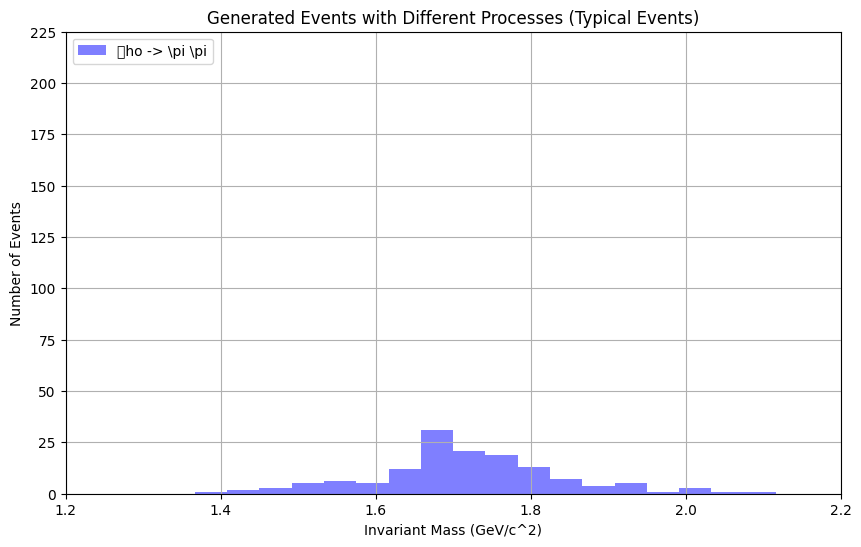

In [3]:
def plot_event_distribution_rho(events_rho_prime):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(1.2, 2.2, 25)
    plt.hist(events_rho_prime, bins=bins, alpha=0.5, label='\rho -> \pi \pi', color='blue')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    #plt.yscale('log')  # Log scale for y-axis
    plt.xlim(1.2,2.2)
    plt.ylabel('Number of Events')
    plt.ylim(0,225)
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

#plt.rcParams.update({'font.size': 15})

def generate_all_events_rho():
    events_rho_prime = generate_rhoprime_events(140)
    
    rho_prime = compute_invariant_masses_for_events_pion(events_rho_prime)
    
    plot_event_distribution_rho(rho_prime)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_rho()

[228.74189114791, 240.73614770630826, 232.8821580773011, 227.50698497372923, 233.95047814379404, 222.63632283564883, 210.0640670961805, 183.79510267882105, 209.54277623498362, 208.2660342956182, 210.5858261833972, 189.49199685551903, 246.08256542771176, 203.53596580030415, 220.49128896419757, 235.47330959090033, 211.49874410228887, 243.71345753513364, 210.86742947122318, 185.30350841507743, 243.6516786534142, 207.85999429954634, 194.9914844216963, 202.43541134859976, 193.98685770626662, 224.4793880003568, 213.84744246881777, 240.94001447966372, 204.96147819787086, 212.60590750204204, 222.66381911772598, 233.50070330551097, 201.30871844857472, 191.15290210486378, 193.9315332927577, 247.13772080114381, 241.78971751767372, 212.31515373927198, 221.7622643273111, 248.7834388421535, 201.18849369892456, 251.05037219772942, 215.20073451805416, 221.23744397704206, 208.03393851567907, 249.1187855665773, 194.2014522251411, 246.05778019095425, 221.27952860390843, 203.64529154561748, 283.3914798484

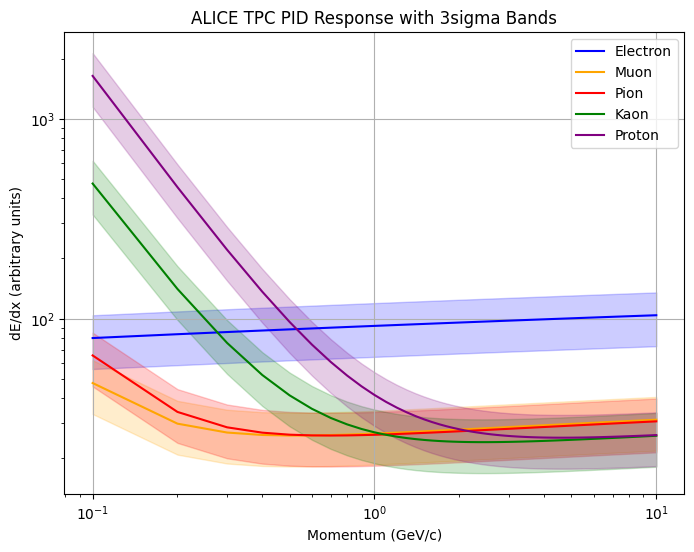

In [2]:
#PID PLOT WITH BANDS
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = ((K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2)) * 17
    
    return dEdx

def tpc_pid_response(momentum, particle_type, stretch_factor=1):
    mass_dict = {
        'electron': 0.000511,
        'muon': 0.10566,
        'pion': 0.13957,
        'kaon': 0.49367,
        'proton': 0.93827
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    dEdx = bethe_bloch(momentum, mass) * stretch_factor
    lower_band = dEdx * 0.7
    upper_band = dEdx * 1.3
    
    return dEdx, lower_band, upper_band

def error_extremes(momentum, particle_type, stretch_factor):
    _, lower_band, upper_band = tpc_pid_response(momentum, particle_type, stretch_factor)
    return upper_band, lower_band

def random_gaussian(mean, sigma):

    return np.random.normal(mean, sigma)

def gaussian_tpc_response(momentum, particle_type, stretch_factor):

    # Get the mean dE/dx from TPC PID response
    mean_dEdx, _, _ = tpc_pid_response(momentum, particle_type,stretch_factor)
    
    # Calculate the extremes for the 3σ band
    upper_band, lower_band = error_extremes(momentum, particle_type, stretch_factor)
    
    # Estimate σ as 1/3rd of the difference between the upper and lower bands
    sigma_dEdx = (upper_band - lower_band) / 6
    
    # Generate a random dE/dx value from a Gaussian distribution
    random_dEdx = random_gaussian(mean_dEdx, sigma_dEdx)
    
    return random_dEdx

 # Example usage
momentum = .3  # Example momentum in GeV/c
particle_type = 'proton'  # Example particle type
x=1000 #Amount of random numbers

rn=[]
for _ in range(x):

    if (particle_type == 'electron'):
        stretch_factor=1
    elif (particle_type == 'muon'):
        stretch_factor=.41
    elif (particle_type == 'pion'):
        stretch_factor=.41
    elif (particle_type == 'kaon'):
        stretch_factor=.38
    elif (particle_type == 'proton'):
        stretch_factor=.40

    random_value = gaussian_tpc_response(momentum, particle_type, stretch_factor)
    rn.append(random_value)
print(rn)

xvalues=[]
for _ in range(x):
    xvalues.append(momentum)
print(xvalues)

def plot_tpc_pid_response(momentum_range):
    """
    Plot the TPC PID response and error bands for various particle types.
    """
    # Calculate responses and PID bands for different particle species
    particle_types = {
        'Electron': {'color': 'blue', 'stretch_factor': 1},
        'Muon': {'color': 'orange', 'stretch_factor': 0.41},
        'Pion': {'color': 'red', 'stretch_factor': 0.41},
        'Kaon': {'color': 'green', 'stretch_factor': 0.38},
        'Proton': {'color': 'purple', 'stretch_factor': 0.4}
    }
    
    plt.figure(figsize=(8, 6))
    
    for particle, settings in particle_types.items():
        response, lower_band, upper_band = tpc_pid_response(momentum_range, particle.lower(), settings['stretch_factor'])
        plt.plot(momentum_range, response, label=particle, color=settings['color'])
        plt.fill_between(momentum_range, lower_band, upper_band, color=settings['color'], alpha=0.2)
    
   # plt.plot(xvalues,rn, color= 'black')
    
    plt.xlabel('Momentum (GeV/c)')
    plt.ylabel('dE/dx (arbitrary units)')
    plt.xscale('log')  # Log scale for x-axis
    plt.yscale('log')  # Log scale for y-axis
    plt.title('ALICE TPC PID Response with 3sigma Bands')
    plt.legend()
    plt.grid(True)
    #plt.savefig("PID_empty.pdf")
    plt.show()
    
# Generate a momentum range and plot
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c
plot_tpc_pid_response(momentum_range)


# First Generation Dataframes

In [3]:
import pandas as pd

data_for_pp_muons_gen1 = []
pp_muons_events = generate_photon_photon_events(n_photon_photon)
for event_id, event in enumerate(pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_pp_muons_gen1 = pd.DataFrame(data_for_pp_muons_gen1)

data_for_jpsimuons_gen1= []
jpsi_muons_events = generate_jpsi_events(n_jpsi)
for event_id, event in enumerate(jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_jpsimuons_gen1 = pd.DataFrame(data_for_jpsimuons_gen1)

data_for_jpsiprotons_gen1= []
jpsi_protons_events = generate_jpsi_protons_events(n_jpsi_protons)
for event_id, event in enumerate(jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
df_jpsiprotons_gen1 = pd.DataFrame(data_for_jpsiprotons_gen1)

data_for_jpsielectrons_gen1= []
jpsi_electrons_events = generate_jpsi_electrons_events(n_jpsi_electrons)
for event_id, event in enumerate(jpsi_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
df_jpsielectrons_gen1 = pd.DataFrame(data_for_jpsielectrons_gen1)

data_for_psi2smuons_gen1 = []
psi2s_muons_events = generate_psi2S_muons_events(n_psi2S_muons)
for event_id, event in enumerate(psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_psi2smuons_gen1 = pd.DataFrame(data_for_psi2smuons_gen1)

data_for_pp_kaons_gen1 = []
pp_kaons_events = generate_pp_kaon_events(n_pp_kaon)
for event_id, event in enumerate(pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
df_pp_kaons_gen1 = pd.DataFrame(data_for_pp_kaons_gen1)

data_for_pp_protons_gen1 = []
pp_protons_events = generate_photon_photon_proton_events(n_photon_photon_proton)
for event_id, event in enumerate(pp_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
df_pp_protons_gen1 = pd.DataFrame(data_for_pp_protons_gen1)

data_for_pp_electrons_gen1 = []
pp_electrons_events = generate_photon_photon_electron_events(n_photon_photon_electron)
for event_id, event in enumerate(pp_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
df_pp_electrons_gen1 = pd.DataFrame(data_for_pp_electrons_gen1)

data_for_psi2s_muons_pions_gen1 = []
psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_psi2S_jpsi_pions)
for event_id, event in enumerate(psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
df_psi2s_muons_pions_gen1 = pd.DataFrame(data_for_psi2s_muons_pions_gen1)
df_psi2s_muons_pions_gen1.head()

data_for_pentaquark_gen1 = []
pentaquark_events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pq1)
for event_id, event in enumerate(pentaquark_events):
    muon1_p, muon2_p, proton_p, _, _, _ = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    proton_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton_p[0], "py": proton_p[1], "pz": proton_p[2], "Energy": proton_E})
df_pentaquark_gen1 = pd.DataFrame(data_for_pentaquark_gen1)

data_for_jpsi_four_pions_gen1 = []
jpsi_four_pions_events = generate_jpsi_four_pions(n_jpsi_4pi)
for event_id, event in enumerate(jpsi_four_pions_events):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E = event
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion4_p[0], "py": pion4_p[1], "pz": pion4_p[2], "Energy": p4_E})
df_jpsi_four_pions_gen1 = pd.DataFrame(data_for_jpsi_four_pions_gen1)


In [4]:
data_for_rho_gen1= []
rho_events = generate_rhoprime_events(n_rhoprime)
for event_id, event in enumerate(rho_events):
    pion1_p, pion2_p = event
    pion1_E = np.sqrt(np.linalg.norm(pion1_p)**2 + m_pion**2)
    pion2_E = np.sqrt(np.linalg.norm(pion2_p)**2 + m_pion**2)
    data_for_rho_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": pion1_E})
    data_for_rho_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": pion2_E})
df_rho_gen1 = pd.DataFrame(data_for_rho_gen1)

In [5]:
n_training = 30000

training_data_for_pp_muons_gen1 = []
training_pp_muons_events = generate_photon_photon_events(n_training)
for event_id, event in enumerate(training_pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_pp_muons_gen1 = pd.DataFrame(training_data_for_pp_muons_gen1)

training_data_for_jpsimuons_gen1= []
training_jpsi_muons_events = generate_jpsi_events(n_training)
for event_id, event in enumerate(training_jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_jpsimuons_gen1 = pd.DataFrame(training_data_for_jpsimuons_gen1)

training_data_for_jpsielectrons_gen1= []
training_jpsi_electrons_events = generate_jpsi_electrons_events(n_training)
for event_id, event in enumerate(training_jpsi_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    training_data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    training_data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
training_df_jpsielectrons_gen1 = pd.DataFrame(training_data_for_jpsielectrons_gen1)

training_data_for_jpsiprotons_gen1= []
training_jpsi_protons_events = generate_jpsi_protons_events(n_training)
for event_id, event in enumerate(training_jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
training_df_jpsiprotons_gen1 = pd.DataFrame(training_data_for_jpsiprotons_gen1)

training_data_for_psi2smuons_gen1 = []
training_psi2s_muons_events = generate_psi2S_muons_events(n_training)
for event_id, event in enumerate(training_psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_psi2smuons_gen1 = pd.DataFrame(training_data_for_psi2smuons_gen1)

training_data_for_pp_kaons_gen1 = []
training_pp_kaons_events = generate_pp_kaon_events(n_training)
for event_id, event in enumerate(training_pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
training_df_pp_kaons_gen1 = pd.DataFrame(training_data_for_pp_kaons_gen1)

training_data_for_pp_protons_gen1 = []
training_pp_protons_events = generate_photon_photon_proton_events(n_training)
for event_id, event in enumerate(training_pp_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    training_data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    training_data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
training_df_pp_protons_gen1 = pd.DataFrame(training_data_for_pp_protons_gen1)

training_data_for_pp_electrons_gen1 = []
training_pp_electrons_events = generate_photon_photon_electron_events(n_training)
for event_id, event in enumerate(training_pp_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    training_data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    training_data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
training_df_pp_electrons_gen1 = pd.DataFrame(training_data_for_pp_electrons_gen1)

training_data_for_psi2s_muons_pions_gen1 = []
training_psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_training)
for event_id, event in enumerate(training_psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
training_df_psi2s_muons_pions_gen1 = pd.DataFrame(training_data_for_psi2s_muons_pions_gen1)
training_df_psi2s_muons_pions_gen1.head()

,EventID,Particle,px,py,pz,Energy
0,0,muon,1.305167,-1.177488,-0.035533,1.761353
1,0,muon,-0.428177,1.324936,0.727042,1.574340
2,0,pion,0.057631,0.026930,0.168678,0.227988
3,0,pion,-0.955750,-0.158711,-0.846908,0.160420
4,1,muon,-0.684759,-0.131033,1.089658,1.297914


In [6]:
training_data_for_rho_gen1= []
training_rho_events = generate_rhoprime_events(n_training)
for event_id, event in enumerate(training_rho_events):
    pion1_p, pion2_p = event
    pion1_E = np.sqrt(np.linalg.norm(pion1_p)**2 + m_pion**2)
    pion2_E = np.sqrt(np.linalg.norm(pion2_p)**2 + m_pion**2)
    training_data_for_rho_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": pion1_E})
    training_data_for_rho_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": pion2_E})
training_df_rho_gen1 = pd.DataFrame(training_data_for_rho_gen1)
training_df_rho_gen1

,EventID,Particle,px,py,pz,Energy
0,0,pion,0.789031,0.183651,-0.189560,0.843630
1,0,pion,-0.789031,-0.183651,0.189560,0.843630
2,1,pion,0.787581,0.294300,-0.254931,0.889588
3,1,pion,-0.787581,-0.294300,0.254931,0.889588
4,2,pion,-0.449712,-0.695286,-0.144082,0.851999
...,...,...,...,...,...,...
59995,29997,pion,0.261680,0.076119,-0.787214,0.844663
59996,29998,pion,-0.459205,-0.163268,0.678840,0.847248
59997,29998,pion,0.459205,0.163268,-0.678840,0.847248
59998,29999,pion,-0.421887,0.716993,0.137367,0.854644


In [7]:
def compute_invariant_mass_column(df):
    # Group by event
    grouped = df.groupby('EventID')

    invariant_masses = []

    for event_id, group in grouped:

        # Sum of 3-momentum components
        total_px = group['px'].sum()
        total_py = group['py'].sum()
        total_pz = group['pz'].sum()

        # Total momentum magnitude
        total_p = np.sqrt(total_px**2 + total_py**2 + total_pz**2)

        # Sum of energies
        total_energy = group['Energy'].sum()

        # Invariant mass^2 = E^2 – |p|^2
        inv_mass_sq = total_energy**2 - total_p**2

        if inv_mass_sq < 0:
            print(f"Warning: Negative invariant mass squared for EventID {event_id}")
            inv_mass = np.nan
        else:
            inv_mass = np.sqrt(inv_mass_sq)

        # Assign same event mass to all rows in that event
        invariant_masses.extend([inv_mass] * len(group))

    # Append to the DataFrame
    df['InvariantMass'] = invariant_masses
    return df

# training_df_psi2s_muons_pions_mass_gen1 = compute_invariant_mass_column(training_df_psi2s_muons_pions_gen1)
# training_df_psi2s_muons_pions_mass_gen1

# Kinematics Dataframes

In [8]:
def kinematics_pt_eta_phi(px, py, pz):
    pt = np.sqrt(px**2 + py**2)
    p  = np.sqrt(px**2 + py**2 + pz**2)

    # Avoid divisions that cause infinities
    if p != abs(pz):
        eta = 0.5 * np.log((p + pz) / (p - pz))
    else:
        eta = np.nan

    phi = np.arctan2(py, px)

    return pt, eta, phi

In [9]:
invmass = compute_invariant_mass_column(df_jpsimuons_gen1)
invmass

,EventID,Particle,px,py,pz,Energy,InvariantMass
0,0,muon,1.470817,0.091365,0.432842,1.539534,3.079069
1,0,muon,-1.470817,-0.091365,-0.432842,1.539534,3.079069
2,1,muon,0.883258,1.286536,0.225048,1.580231,3.160462
3,1,muon,-0.883258,-1.286536,-0.225048,1.580231,3.160462
4,2,muon,-0.170427,-1.417449,0.538617,1.529535,3.059070
...,...,...,...,...,...,...,...
249595,124797,muon,0.527297,-1.421344,-0.068359,1.521215,3.042431
249596,124798,muon,0.518019,-1.319074,0.655427,1.564943,3.129887
249597,124798,muon,-0.518019,1.319074,-0.655427,1.564943,3.129887
249598,124799,muon,1.467223,0.283443,-0.376690,1.544714,3.089428


In [10]:
df_jpsimuons_gen1 = compute_invariant_mass_column(df_jpsimuons_gen1)

df_kinematics_jpsi = df_jpsimuons_gen1.copy()

df_kinematics_jpsi_mass = df_kinematics_jpsi.groupby("EventID")["InvariantMass"].first().to_frame()

df_kinematics_jpsi["pt"], df_kinematics_jpsi["eta"], df_kinematics_jpsi["phi"] = zip(*df_kinematics_jpsi.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_jpsi.groupby("EventID").size()
df_kinematics_jpsi["Ntracks"] = df_kinematics_jpsi["EventID"].map(track_counts)

df_kinematics_jpsi = df_kinematics_jpsi.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
df_kinematics_jpsi["track_index"] = (
    df_kinematics_jpsi.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
df_kinematics_jpsi = df_kinematics_jpsi.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
df_kinematics_jpsi.columns = [
    f"{var}{i}" for var, i in df_kinematics_jpsi.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in df_kinematics_jpsi:
        df_kinematics_jpsi[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
df_kinematics_jpsi = df_kinematics_jpsi[expected_cols]

ntracks_df = df_jpsimuons_gen1.groupby("EventID").size().rename("Ntracks")

df_kinematics_jpsi = df_kinematics_jpsi.merge(ntracks_df, on="EventID")

df_kinematics_jpsi = df_kinematics_jpsi.merge(df_kinematics_jpsi_mass, on="EventID")

df_kinematics_jpsi = df_kinematics_jpsi.reset_index()

df_kinematics_jpsi


,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,1.473652,0.289653,0.062039,1.473652,-0.289653,-3.079554,0.0,0.0,0.0,0.0,0.0,0.0,2,3.079069
1,1,1.560551,0.143715,0.969161,1.560551,-0.143715,-2.172431,0.0,0.0,0.0,0.0,0.0,0.0,2,3.160462
2,2,1.427658,0.368852,-1.690457,1.427658,-0.368852,1.451136,0.0,0.0,0.0,0.0,0.0,0.0,2,3.059070
3,3,1.248553,-0.658152,-2.737446,1.248553,0.658152,0.404147,0.0,0.0,0.0,0.0,0.0,0.0,2,3.065033
4,4,0.783203,1.289281,1.092729,0.783203,-1.289281,-2.048864,0.0,0.0,0.0,0.0,0.0,0.0,2,3.066204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124795,124795,1.079729,0.916180,-2.298921,1.079729,-0.916180,0.842671,0.0,0.0,0.0,0.0,0.0,0.0,2,3.138086
124796,124796,1.518785,-0.079396,-1.610090,1.518785,0.079396,1.531502,0.0,0.0,0.0,0.0,0.0,0.0,2,3.054469
124797,124797,1.516001,0.045076,1.926042,1.516001,-0.045076,-1.215551,0.0,0.0,0.0,0.0,0.0,0.0,2,3.042431
124798,124798,1.417145,0.447420,-1.196586,1.417145,-0.447420,1.945006,0.0,0.0,0.0,0.0,0.0,0.0,2,3.129887


In [11]:
training_df_jpsimuons_gen1 = compute_invariant_mass_column(training_df_jpsimuons_gen1)

training_df_kinematics_jpsi = training_df_jpsimuons_gen1.copy()

training_df_kinematics_jpsi_mass = training_df_kinematics_jpsi.groupby("EventID")["InvariantMass"].first().to_frame()

training_df_kinematics_jpsi["pt"], training_df_kinematics_jpsi["eta"], training_df_kinematics_jpsi["phi"] = zip(*training_df_kinematics_jpsi.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = training_df_kinematics_jpsi.groupby("EventID").size()
training_df_kinematics_jpsi["Ntracks"] = training_df_kinematics_jpsi["EventID"].map(track_counts)

training_df_kinematics_jpsi = training_df_kinematics_jpsi.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
training_df_kinematics_jpsi["track_index"] = (
    training_df_kinematics_jpsi.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
training_df_kinematics_jpsi = training_df_kinematics_jpsi.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
training_df_kinematics_jpsi.columns = [
    f"{var}{i}" for var, i in training_df_kinematics_jpsi.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in training_df_kinematics_jpsi:
        training_df_kinematics_jpsi[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
training_df_kinematics_jpsi = training_df_kinematics_jpsi[expected_cols]

ntracks_df = training_df_jpsimuons_gen1.groupby("EventID").size().rename("Ntracks")

training_df_kinematics_jpsi = training_df_kinematics_jpsi.merge(ntracks_df, on="EventID")

training_df_kinematics_jpsi = training_df_kinematics_jpsi.merge(training_df_kinematics_jpsi_mass, on="EventID")

training_df_kinematics_jpsi = training_df_kinematics_jpsi.reset_index()

training_df_kinematics_jpsi


,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.769468,1.297339,0.242054,0.769468,-1.297339,-2.899538,0.0,0.0,0.0,0.0,0.0,0.0,2,3.033537
1,1,0.958647,1.048835,1.468156,0.958647,-1.048835,-1.673437,0.0,0.0,0.0,0.0,0.0,0.0,2,3.079404
2,2,1.076535,0.894014,1.990509,1.076535,-0.894014,-1.151083,0.0,0.0,0.0,0.0,0.0,0.0,2,3.079618
3,3,0.684268,1.418952,-2.310609,0.684268,-1.418952,0.830984,0.0,0.0,0.0,0.0,0.0,0.0,2,3.000953
4,4,1.559341,-0.104287,-1.253615,1.559341,0.104287,1.887977,0.0,0.0,0.0,0.0,0.0,0.0,2,3.142769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.269834,-2.412715,1.785267,0.269834,2.412715,-1.356325,0.0,0.0,0.0,0.0,0.0,0.0,2,3.044001
29996,29996,1.358614,-0.488663,2.998825,1.358614,0.488663,-0.142768,0.0,0.0,0.0,0.0,0.0,0.0,2,3.055478
29997,29997,0.941830,1.079999,1.128962,0.941830,-1.079999,-2.012631,0.0,0.0,0.0,0.0,0.0,0.0,2,3.100435
29998,29998,0.970916,-1.028539,-2.079828,0.970916,1.028539,1.061765,0.0,0.0,0.0,0.0,0.0,0.0,2,3.070039


In [12]:
df_jpsielectrons_gen1 = compute_invariant_mass_column(df_jpsielectrons_gen1)

df_kinematics_jpsiel = df_jpsielectrons_gen1.copy()

df_kinematics_jpsiel_mass = df_kinematics_jpsiel.groupby("EventID")["InvariantMass"].first().to_frame()

df_kinematics_jpsiel["pt"], df_kinematics_jpsiel["eta"], df_kinematics_jpsiel["phi"] = zip(*df_kinematics_jpsiel.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_jpsiel.groupby("EventID").size()
df_kinematics_jpsiel["Ntracks"] = df_kinematics_jpsiel["EventID"].map(track_counts)

df_kinematics_jpsiel = df_kinematics_jpsiel.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
df_kinematics_jpsiel["track_index"] = (
    df_kinematics_jpsiel.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
df_kinematics_jpsiel = df_kinematics_jpsiel.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
df_kinematics_jpsiel.columns = [
    f"{var}{i}" for var, i in df_kinematics_jpsiel.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in df_kinematics_jpsiel:
        df_kinematics_jpsiel[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
df_kinematics_jpsiel = df_kinematics_jpsiel[expected_cols]

ntracks_df = df_jpsielectrons_gen1.groupby("EventID").size().rename("Ntracks")

df_kinematics_jpsiel = df_kinematics_jpsiel.merge(ntracks_df, on="EventID")

df_kinematics_jpsiel = df_kinematics_jpsiel.merge(df_kinematics_jpsiel_mass, on="EventID")

df_kinematics_jpsiel = df_kinematics_jpsiel.reset_index()

df_kinematics_jpsiel

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,1.536897,-0.197224,-2.083938,1.536897,0.197224,1.057655,0.0,0.0,0.0,0.0,0.0,0.0,2,3.133769
1,1,0.945107,-1.068932,0.323355,0.945107,1.068932,-2.818238,0.0,0.0,0.0,0.0,0.0,0.0,2,3.076930
2,2,1.524798,-0.205530,2.366992,1.524798,0.205530,-0.774601,0.0,0.0,0.0,0.0,0.0,0.0,2,3.114234
3,3,0.945238,-1.077286,-3.029801,0.945238,1.077286,0.111791,0.0,0.0,0.0,0.0,0.0,0.0,2,3.097752
4,4,0.587813,1.632208,0.975424,0.587813,-1.632208,-2.166168,0.0,0.0,0.0,0.0,0.0,0.0,2,3.121674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84635,84635,1.469928,0.418525,2.951304,1.469928,-0.418525,-0.190289,0.0,0.0,0.0,0.0,0.0,0.0,2,3.201114
84636,84636,1.552077,-0.055480,-0.681164,1.552077,0.055480,2.460428,0.0,0.0,0.0,0.0,0.0,0.0,2,3.108933
84637,84637,1.525280,0.020603,-2.609329,1.525280,-0.020603,0.532264,0.0,0.0,0.0,0.0,0.0,0.0,2,3.051209
84638,84638,0.956399,1.076998,-1.308384,0.956399,-1.076998,1.833208,0.0,0.0,0.0,0.0,0.0,0.0,2,3.133611


In [13]:
training_df_jpsielectrons_gen1 = compute_invariant_mass_column(training_df_jpsielectrons_gen1)

training_df_kinematics_jpsiel = training_df_jpsielectrons_gen1.copy()

training_df_kinematics_jpsiel_mass = training_df_kinematics_jpsiel.groupby("EventID")["InvariantMass"].first().to_frame()

training_df_kinematics_jpsiel["pt"], training_df_kinematics_jpsiel["eta"], training_df_kinematics_jpsiel["phi"] = zip(*training_df_kinematics_jpsiel.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = training_df_kinematics_jpsiel.groupby("EventID").size()
training_df_kinematics_jpsiel["Ntracks"] = training_df_kinematics_jpsiel["EventID"].map(track_counts)

training_df_kinematics_jpsiel = training_df_kinematics_jpsiel.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
training_df_kinematics_jpsiel["track_index"] = (
    training_df_kinematics_jpsiel.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
training_df_kinematics_jpsiel = training_df_kinematics_jpsiel.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
training_df_kinematics_jpsiel.columns = [
    f"{var}{i}" for var, i in training_df_kinematics_jpsiel.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in training_df_kinematics_jpsiel:
        training_df_kinematics_jpsiel[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
training_df_kinematics_jpsiel = training_df_kinematics_jpsiel[expected_cols]

ntracks_df = training_df_jpsielectrons_gen1.groupby("EventID").size().rename("Ntracks")

training_df_kinematics_jpsiel = training_df_kinematics_jpsiel.merge(ntracks_df, on="EventID")

training_df_kinematics_jpsiel = training_df_kinematics_jpsiel.merge(training_df_kinematics_jpsiel_mass, on="EventID")

training_df_kinematics_jpsiel = training_df_kinematics_jpsiel.reset_index()

training_df_kinematics_jpsiel

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,1.549181,0.024388,0.906551,1.549181,-0.024388,-2.235042,0.0,0.0,0.0,0.0,0.0,0.0,2,3.099283
1,1,1.487364,0.366344,-0.025179,1.487364,-0.366344,3.116413,0.0,0.0,0.0,0.0,0.0,0.0,2,3.176587
2,2,1.467576,0.297194,0.288837,1.467576,-0.297194,-2.852756,0.0,0.0,0.0,0.0,0.0,0.0,2,3.065732
3,3,1.480881,0.250296,2.457980,1.480881,-0.250296,-0.683612,0.0,0.0,0.0,0.0,0.0,0.0,2,3.055022
4,4,1.545766,0.096559,-0.033968,1.545766,-0.096559,3.107625,0.0,0.0,0.0,0.0,0.0,0.0,2,3.105956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,1.421953,0.391174,1.546873,1.421953,-0.391174,-1.594719,0.0,0.0,0.0,0.0,0.0,0.0,2,3.064277
29996,29996,1.054109,0.927603,1.425632,1.054109,-0.927603,-1.715961,0.0,0.0,0.0,0.0,0.0,0.0,2,3.082152
29997,29997,1.460778,-0.327077,0.900885,1.460778,0.327077,-2.240708,0.0,0.0,0.0,0.0,0.0,0.0,2,3.079227
29998,29998,1.488227,-0.269457,-2.952682,1.488227,0.269457,0.188911,0.0,0.0,0.0,0.0,0.0,0.0,2,3.085166


In [14]:
df_jpsiprotons_gen1 = compute_invariant_mass_column(df_jpsiprotons_gen1)

df_kinematics_jpsipro = df_jpsiprotons_gen1.copy()

df_kinematics_jpsipro_mass = df_kinematics_jpsipro.groupby("EventID")["InvariantMass"].first().to_frame()

df_kinematics_jpsipro["pt"], df_kinematics_jpsipro["eta"], df_kinematics_jpsipro["phi"] = zip(*df_kinematics_jpsipro.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_jpsipro.groupby("EventID").size()
df_kinematics_jpsipro["Ntracks"] = df_kinematics_jpsipro["EventID"].map(track_counts)

df_kinematics_jpsipro = df_kinematics_jpsipro.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
df_kinematics_jpsipro["track_index"] = (
    df_kinematics_jpsipro.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
df_kinematics_jpsipro = df_kinematics_jpsipro.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
df_kinematics_jpsipro.columns = [
    f"{var}{i}" for var, i in df_kinematics_jpsipro.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in df_kinematics_jpsipro:
        df_kinematics_jpsipro[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
df_kinematics_jpsipro = df_kinematics_jpsipro[expected_cols]

ntracks_df = df_jpsiprotons_gen1.groupby("EventID").size().rename("Ntracks")

df_kinematics_jpsipro = df_kinematics_jpsipro.merge(ntracks_df, on="EventID")

df_kinematics_jpsipro = df_kinematics_jpsipro.merge(df_kinematics_jpsipro_mass, on="EventID")

df_kinematics_jpsipro = df_kinematics_jpsipro.reset_index()

df_kinematics_jpsipro

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.881207,-0.854571,-0.115620,0.881207,0.854571,3.025973,0.0,0.0,0.0,0.0,0.0,0.0,2,3.082644
1,1,1.249664,-0.163870,0.870122,1.249664,0.163870,-2.271470,0.0,0.0,0.0,0.0,0.0,0.0,2,3.152026
2,2,1.234904,0.038878,2.890564,1.234904,-0.038878,-0.251029,0.0,0.0,0.0,0.0,0.0,0.0,2,3.102991
3,3,0.965626,0.687154,-1.309374,0.965626,-0.687154,1.832218,0.0,0.0,0.0,0.0,0.0,0.0,2,3.050485
4,4,0.948263,-0.747291,1.434114,0.948263,0.747291,-1.707478,0.0,0.0,0.0,0.0,0.0,0.0,2,3.086695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2435,0.624752,-1.280361,-1.524714,0.624752,1.280361,1.616879,0.0,0.0,0.0,0.0,0.0,0.0,2,3.063144
2436,2436,1.179989,-0.313449,2.930826,1.179989,0.313449,-0.210767,0.0,0.0,0.0,0.0,0.0,0.0,2,3.107126
2437,2437,1.130099,0.403083,-2.068945,1.130099,-0.403083,1.072647,0.0,0.0,0.0,0.0,0.0,0.0,2,3.082826
2438,2438,1.125171,-0.416612,-1.594028,1.125171,0.416612,1.547565,0.0,0.0,0.0,0.0,0.0,0.0,2,3.084541


In [15]:
training_df_jpsiprotons_gen1 = compute_invariant_mass_column(training_df_jpsiprotons_gen1)

training_df_kinematics_jpsipro = training_df_jpsiprotons_gen1.copy()

training_df_kinematics_jpsipro_mass = training_df_kinematics_jpsipro.groupby("EventID")["InvariantMass"].first().to_frame()

training_df_kinematics_jpsipro["pt"], training_df_kinematics_jpsipro["eta"], training_df_kinematics_jpsipro["phi"] = zip(*training_df_kinematics_jpsipro.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = training_df_kinematics_jpsipro.groupby("EventID").size()
training_df_kinematics_jpsipro["Ntracks"] = training_df_kinematics_jpsipro["EventID"].map(track_counts)

training_df_kinematics_jpsipro = training_df_kinematics_jpsipro.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
training_df_kinematics_jpsipro["track_index"] = (
    training_df_kinematics_jpsipro.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
training_df_kinematics_jpsipro = training_df_kinematics_jpsipro.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
training_df_kinematics_jpsipro.columns = [
    f"{var}{i}" for var, i in training_df_kinematics_jpsipro.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in training_df_kinematics_jpsipro:
        training_df_kinematics_jpsipro[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
training_df_kinematics_jpsipro = training_df_kinematics_jpsipro[expected_cols]

ntracks_df = training_df_jpsiprotons_gen1.groupby("EventID").size().rename("Ntracks")

training_df_kinematics_jpsipro = training_df_kinematics_jpsipro.merge(ntracks_df, on="EventID")

training_df_kinematics_jpsipro = training_df_kinematics_jpsipro.merge(training_df_kinematics_jpsipro_mass, on="EventID")

training_df_kinematics_jpsipro = training_df_kinematics_jpsipro.reset_index()

training_df_kinematics_jpsipro

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,1.211909,0.228103,1.432643,1.211909,-0.228103,-1.708950,0.0,0.0,0.0,0.0,0.0,0.0,2,3.115331
1,1,0.649482,1.215926,1.661862,0.649482,-1.215926,-1.479731,0.0,0.0,0.0,0.0,0.0,0.0,2,3.033226
2,2,0.883852,-0.827531,-2.195182,0.883852,0.827531,0.946411,0.0,0.0,0.0,0.0,0.0,0.0,2,3.052760
3,3,0.955085,0.732503,2.534905,0.955085,-0.732503,-0.606688,0.0,0.0,0.0,0.0,0.0,0.0,2,3.082546
4,4,0.795308,1.009018,1.127922,0.795308,-1.009018,-2.013670,0.0,0.0,0.0,0.0,0.0,0.0,2,3.102777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,1.120934,0.403859,0.697223,1.120934,-0.403859,-2.444370,0.0,0.0,0.0,0.0,0.0,0.0,2,3.067676
29996,29996,1.124605,0.442565,2.625564,1.124605,-0.442565,-0.516029,0.0,0.0,0.0,0.0,0.0,0.0,2,3.104125
29997,29997,0.874256,-0.874550,1.359385,0.874256,0.874550,-1.782208,0.0,0.0,0.0,0.0,0.0,0.0,2,3.094411
29998,29998,0.456971,-1.636380,-0.546446,0.456971,1.636380,2.595147,0.0,0.0,0.0,0.0,0.0,0.0,2,3.074822


In [16]:
df_psi2smuons_gen1 = compute_invariant_mass_column(df_psi2smuons_gen1)

df_kinematics_psi2smu = df_psi2smuons_gen1.copy()

df_kinematics_psi2smu_mass = df_kinematics_psi2smu.groupby("EventID")["InvariantMass"].first().to_frame()

df_kinematics_psi2smu["pt"], df_kinematics_psi2smu["eta"], df_kinematics_psi2smu["phi"] = zip(*df_kinematics_psi2smu.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_psi2smu.groupby("EventID").size()
df_kinematics_psi2smu["Ntracks"] = df_kinematics_psi2smu["EventID"].map(track_counts)

df_kinematics_psi2smu = df_kinematics_psi2smu.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
df_kinematics_psi2smu["track_index"] = (
    df_kinematics_psi2smu.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
df_kinematics_psi2smu = df_kinematics_psi2smu.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
df_kinematics_psi2smu.columns = [
    f"{var}{i}" for var, i in df_kinematics_psi2smu.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in df_kinematics_psi2smu:
        df_kinematics_psi2smu[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
df_kinematics_psi2smu = df_kinematics_psi2smu[expected_cols]

ntracks_df = df_psi2smuons_gen1.groupby("EventID").size().rename("Ntracks")

df_kinematics_psi2smu = df_kinematics_psi2smu.merge(ntracks_df, on="EventID")

df_kinematics_psi2smu = df_kinematics_psi2smu.merge(df_kinematics_psi2smu_mass, on="EventID")

df_kinematics_psi2smu = df_kinematics_psi2smu.reset_index()

df_kinematics_psi2smu

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,1.842950,-0.006756,-1.912572,1.842950,0.006756,1.229021,0.0,0.0,0.0,0.0,0.0,0.0,2,3.692036
1,1,1.823527,-0.084532,2.358979,1.823527,0.084532,-0.782614,0.0,0.0,0.0,0.0,0.0,0.0,2,3.666186
2,2,0.666856,-1.693047,2.844674,0.666856,1.693047,-0.296918,0.0,0.0,0.0,0.0,0.0,0.0,2,3.753670
3,3,1.729288,0.369327,-0.043262,1.729288,-0.369327,3.098331,0.0,0.0,0.0,0.0,0.0,0.0,2,3.703183
4,4,1.090381,1.047518,-0.471466,1.090381,-1.047518,2.670127,0.0,0.0,0.0,0.0,0.0,0.0,2,3.497107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,2315,1.518950,-0.567488,-1.412367,1.518950,0.567488,1.729225,0.0,0.0,0.0,0.0,0.0,0.0,2,3.546638
2316,2316,1.350776,0.847782,1.619255,1.350776,-0.847782,-1.522337,0.0,0.0,0.0,0.0,0.0,0.0,2,3.737939
2317,2317,0.853695,1.405246,-2.430606,0.853695,-1.405246,0.710986,0.0,0.0,0.0,0.0,0.0,0.0,2,3.695577
2318,2318,1.794282,-0.107126,2.677612,1.794282,0.107126,-0.463981,0.0,0.0,0.0,0.0,0.0,0.0,2,3.615356


In [17]:
training_df_psi2smuons_gen1 = compute_invariant_mass_column(training_df_psi2smuons_gen1)

training_df_kinematics_psi2smu = training_df_psi2smuons_gen1.copy()

training_df_kinematics_psi2smu_mass = training_df_kinematics_psi2smu.groupby("EventID")["InvariantMass"].first().to_frame()

training_df_kinematics_psi2smu["pt"], training_df_kinematics_psi2smu["eta"], training_df_kinematics_psi2smu["phi"] = zip(*training_df_kinematics_psi2smu.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = training_df_kinematics_psi2smu.groupby("EventID").size()
training_df_kinematics_psi2smu["Ntracks"] = training_df_kinematics_psi2smu["EventID"].map(track_counts)

training_df_kinematics_psi2smu = training_df_kinematics_psi2smu.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
training_df_kinematics_psi2smu["track_index"] = (
    training_df_kinematics_psi2smu.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
training_df_kinematics_psi2smu = training_df_kinematics_psi2smu.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
training_df_kinematics_psi2smu.columns = [
    f"{var}{i}" for var, i in training_df_kinematics_psi2smu.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in training_df_kinematics_psi2smu:
        training_df_kinematics_psi2smu[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
training_df_kinematics_psi2smu = training_df_kinematics_psi2smu[expected_cols]

ntracks_df = training_df_psi2smuons_gen1.groupby("EventID").size().rename("Ntracks")

training_df_kinematics_psi2smu = training_df_kinematics_psi2smu.merge(ntracks_df, on="EventID")

training_df_kinematics_psi2smu = training_df_kinematics_psi2smu.merge(training_df_kinematics_psi2smu_mass, on="EventID")

training_df_kinematics_psi2smu = training_df_kinematics_psi2smu.reset_index()

training_df_kinematics_psi2smu

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.399434,-2.205322,-2.005649,0.399434,2.205322,1.135944,0.0,0.0,0.0,0.0,0.0,0.0,2,3.674237
1,1,1.931445,0.007871,-1.921643,1.931445,-0.007871,1.219949,0.0,0.0,0.0,0.0,0.0,0.0,2,3.868785
2,2,1.148183,-1.010641,-2.920243,1.148183,1.010641,0.221350,0.0,0.0,0.0,0.0,0.0,0.0,2,3.578641
3,3,1.462356,-0.691337,0.175916,1.462356,0.691337,-2.965677,0.0,0.0,0.0,0.0,0.0,0.0,2,3.658036
4,4,1.781720,-0.053394,-1.393343,1.781720,0.053394,1.748250,0.0,0.0,0.0,0.0,0.0,0.0,2,3.574772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,1.677001,0.403827,1.051271,1.677001,-0.403827,-2.090321,0.0,0.0,0.0,0.0,0.0,0.0,2,3.637361
29996,29996,0.902325,-1.317424,0.919902,0.902325,1.317424,-2.221690,0.0,0.0,0.0,0.0,0.0,0.0,2,3.616934
29997,29997,1.023613,1.171915,0.405366,1.023613,-1.171915,-2.736226,0.0,0.0,0.0,0.0,0.0,0.0,2,3.627642
29998,29998,1.699509,-0.305889,-0.486951,1.699509,0.305889,2.654642,0.0,0.0,0.0,0.0,0.0,0.0,2,3.565550


In [18]:
df_pp_kaons_gen1 = compute_invariant_mass_column(df_pp_kaons_gen1)

df_kinematics_ppka = df_pp_kaons_gen1.copy()

df_kinematics_ppka_mass = df_kinematics_ppka.groupby("EventID")["InvariantMass"].first().to_frame()

df_kinematics_ppka["pt"], df_kinematics_ppka["eta"], df_kinematics_ppka["phi"] = zip(*df_kinematics_ppka.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_ppka.groupby("EventID").size()
df_kinematics_ppka["Ntracks"] = df_kinematics_ppka["EventID"].map(track_counts)

df_kinematics_ppka = df_kinematics_ppka.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
df_kinematics_ppka["track_index"] = (
    df_kinematics_ppka.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
df_kinematics_ppka = df_kinematics_ppka.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
df_kinematics_ppka.columns = [
    f"{var}{i}" for var, i in df_kinematics_ppka.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in df_kinematics_ppka:
        df_kinematics_ppka[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
df_kinematics_ppka = df_kinematics_ppka[expected_cols]

ntracks_df = df_pp_kaons_gen1.groupby("EventID").size().rename("Ntracks")

df_kinematics_ppka = df_kinematics_ppka.merge(ntracks_df, on="EventID")

df_kinematics_ppka = df_kinematics_ppka.merge(df_kinematics_ppka_mass, on="EventID")

df_kinematics_ppka = df_kinematics_ppka.reset_index()

df_kinematics_ppka

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.757679,-0.583678,1.485475,0.757679,0.583678,-1.656118,0.0,0.0,0.0,0.0,0.0,0.0,2,2.036278
1,1,0.183049,-1.258407,1.948874,0.183049,1.258407,-1.192719,0.0,0.0,0.0,0.0,0.0,0.0,2,1.208173
2,2,0.395601,0.491703,0.807510,0.395601,-0.491703,-2.334082,0.0,0.0,0.0,0.0,0.0,0.0,2,1.328453
3,3,0.449163,-0.811737,2.428311,0.449163,0.811737,-0.713282,0.0,0.0,0.0,0.0,0.0,0.0,2,1.562407
4,4,0.606787,-0.333071,1.671744,0.606787,0.333071,-1.469848,0.0,0.0,0.0,0.0,0.0,0.0,2,1.617750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,16915,0.285258,-1.310250,0.251089,0.285258,1.310250,-2.890503,0.0,0.0,0.0,0.0,0.0,0.0,2,1.503919
16916,16916,0.246691,-0.868812,0.931002,0.246691,0.868812,-2.210591,0.0,0.0,0.0,0.0,0.0,0.0,2,1.205469
16917,16917,0.220774,1.436205,-2.260311,0.220774,-1.436205,0.881281,0.0,0.0,0.0,0.0,0.0,0.0,2,1.391692
16918,16918,0.667595,-0.579769,1.053723,0.667595,0.579769,-2.087870,0.0,0.0,0.0,0.0,0.0,0.0,2,1.851223


In [19]:
training_df_pp_kaons_gen1 = compute_invariant_mass_column(training_df_pp_kaons_gen1)

training_df_kinematics_ppka = training_df_pp_kaons_gen1.copy()

training_df_kinematics_ppka_mass = training_df_kinematics_ppka.groupby("EventID")["InvariantMass"].first().to_frame()

training_df_kinematics_ppka["pt"], training_df_kinematics_ppka["eta"], training_df_kinematics_ppka["phi"] = zip(*training_df_kinematics_ppka.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = training_df_kinematics_ppka.groupby("EventID").size()
training_df_kinematics_ppka["Ntracks"] = training_df_kinematics_ppka["EventID"].map(track_counts)

training_df_kinematics_ppka = training_df_kinematics_ppka.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
training_df_kinematics_ppka["track_index"] = (
    training_df_kinematics_ppka.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
training_df_kinematics_ppka = training_df_kinematics_ppka.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
training_df_kinematics_ppka.columns = [
    f"{var}{i}" for var, i in training_df_kinematics_ppka.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in training_df_kinematics_ppka:
        training_df_kinematics_ppka[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
training_df_kinematics_ppka = training_df_kinematics_ppka[expected_cols]

ntracks_df = training_df_pp_kaons_gen1.groupby("EventID").size().rename("Ntracks")

training_df_kinematics_ppka = training_df_kinematics_ppka.merge(ntracks_df, on="EventID")

training_df_kinematics_ppka = training_df_kinematics_ppka.merge(training_df_kinematics_ppka_mass, on="EventID")

training_df_kinematics_ppka = training_df_kinematics_ppka.reset_index()

training_df_kinematics_ppka

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.826882,-0.316508,0.530953,0.826882,0.316508,-2.610639,0.0,0.0,0.0,0.0,0.0,0.0,2,1.998257
1,1,0.125350,1.867739,1.771448,0.125350,-1.867739,-1.370145,0.0,0.0,0.0,0.0,0.0,0.0,2,1.290400
2,2,0.682959,-0.418834,2.441961,0.682959,0.418834,-0.699631,0.0,0.0,0.0,0.0,0.0,0.0,2,1.785344
3,3,0.679881,-0.715896,-0.923140,0.679881,0.715896,2.218452,0.0,0.0,0.0,0.0,0.0,0.0,2,1.986140
4,4,0.689957,-0.818832,-2.686084,0.689957,0.818832,0.455509,0.0,0.0,0.0,0.0,0.0,0.0,2,2.113722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.223583,1.685770,-2.568130,0.223583,-1.685770,0.573463,0.0,0.0,0.0,0.0,0.0,0.0,2,1.591349
29996,29996,0.519118,0.587752,-2.728781,0.519118,-0.587752,0.412812,0.0,0.0,0.0,0.0,0.0,0.0,2,1.571640
29997,29997,0.598419,0.551636,-2.985256,0.598419,-0.551636,0.156336,0.0,0.0,0.0,0.0,0.0,0.0,2,1.699765
29998,29998,0.441579,0.287455,2.667014,0.441579,-0.287455,-0.474579,0.0,0.0,0.0,0.0,0.0,0.0,2,1.349464


In [20]:
df_pp_electrons_gen1 = compute_invariant_mass_column(df_pp_electrons_gen1)

df_kinematics_ppel = df_pp_electrons_gen1.copy()

df_kinematics_ppel_mass = df_kinematics_ppel.groupby("EventID")["InvariantMass"].first().to_frame()

df_kinematics_ppel["pt"], df_kinematics_ppel["eta"], df_kinematics_ppel["phi"] = zip(*df_kinematics_ppel.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_ppel.groupby("EventID").size()
df_kinematics_ppel["Ntracks"] = df_kinematics_ppel["EventID"].map(track_counts)

df_kinematics_ppel = df_kinematics_ppel.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
df_kinematics_ppel["track_index"] = (
    df_kinematics_ppel.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
df_kinematics_ppel = df_kinematics_ppel.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
df_kinematics_ppel.columns = [
    f"{var}{i}" for var, i in df_kinematics_ppel.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in df_kinematics_ppel:
        df_kinematics_ppel[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
df_kinematics_ppel = df_kinematics_ppel[expected_cols]

ntracks_df = df_pp_kaons_gen1.groupby("EventID").size().rename("Ntracks")

df_kinematics_ppel = df_kinematics_ppel.merge(ntracks_df, on="EventID")

df_kinematics_ppel = df_kinematics_ppel.merge(df_kinematics_ppel_mass, on="EventID")

df_kinematics_ppel = df_kinematics_ppel.reset_index()

df_kinematics_ppel

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.475727,-1.573561,-1.402542,0.475727,1.573561,1.739051,0.0,0.0,0.0,0.0,0.0,0.0,2,2.393428
1,1,0.423046,0.469274,1.461745,0.423046,-0.469274,-1.679847,0.0,0.0,0.0,0.0,0.0,0.0,2,0.940977
2,2,0.227124,-0.488831,-1.270826,0.227124,0.488831,1.870766,0.0,0.0,0.0,0.0,0.0,0.0,2,0.509610
3,3,0.041945,3.351040,1.493388,0.041945,-3.351040,-1.648204,0.0,0.0,0.0,0.0,0.0,0.0,2,1.198273
4,4,0.540786,-1.126497,1.914831,0.540786,1.126497,-1.226762,0.0,0.0,0.0,0.0,0.0,0.0,2,1.843539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,16915,0.603637,0.097656,-1.749768,0.603637,-0.097656,1.391824,0.0,0.0,0.0,0.0,0.0,0.0,2,1.213037
16916,16916,0.084965,-3.398115,-0.952348,0.084965,3.398115,2.189244,0.0,0.0,0.0,0.0,0.0,0.0,2,2.543940
16917,16917,0.275244,0.674206,-1.640454,0.275244,-0.674206,1.501138,0.0,0.0,0.0,0.0,0.0,0.0,2,0.680414
16918,16918,0.121640,-0.489252,0.331916,0.121640,0.489252,-2.809677,0.0,0.0,0.0,0.0,0.0,0.0,2,0.272983


In [21]:
training_df_pp_electrons_gen1 = compute_invariant_mass_column(training_df_pp_electrons_gen1)

training_df_kinematics_ppel = training_df_pp_electrons_gen1.copy()

training_df_kinematics_ppel_mass = training_df_kinematics_ppel.groupby("EventID")["InvariantMass"].first().to_frame()

training_df_kinematics_ppel["pt"], training_df_kinematics_ppel["eta"], training_df_kinematics_ppel["phi"] = zip(*training_df_kinematics_ppel.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = training_df_kinematics_ppel.groupby("EventID").size()
training_df_kinematics_ppel["Ntracks"] = training_df_kinematics_ppel["EventID"].map(track_counts)

training_df_kinematics_ppel = training_df_kinematics_ppel.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
training_df_kinematics_ppel["track_index"] = (
    training_df_kinematics_ppel.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
training_df_kinematics_ppel = training_df_kinematics_ppel.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
training_df_kinematics_ppel.columns = [
    f"{var}{i}" for var, i in training_df_kinematics_ppel.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in training_df_kinematics_ppel:
        training_df_kinematics_ppel[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
training_df_kinematics_ppel = training_df_kinematics_ppel[expected_cols]

ntracks_df = training_df_pp_kaons_gen1.groupby("EventID").size().rename("Ntracks")

training_df_kinematics_ppel = training_df_kinematics_ppel.merge(ntracks_df, on="EventID")

training_df_kinematics_ppel = training_df_kinematics_ppel.merge(training_df_kinematics_ppel_mass, on="EventID")

training_df_kinematics_ppel = training_df_kinematics_ppel.reset_index()

training_df_kinematics_ppel

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.234424,0.060523,-1.038118,0.234424,-0.060523,2.103474,0.0,0.0,0.0,0.0,0.0,0.0,2,0.469708
1,1,0.170390,-0.625295,-1.642225,0.170390,0.625295,1.499368,0.0,0.0,0.0,0.0,0.0,0.0,2,0.409602
2,2,0.558350,0.745292,-1.915283,0.558350,-0.745292,1.226310,0.0,0.0,0.0,0.0,0.0,0.0,2,1.441465
3,3,0.197835,0.272601,2.721224,0.197835,-0.272601,-0.420369,0.0,0.0,0.0,0.0,0.0,0.0,2,0.410464
4,4,0.302463,-0.167165,-2.161579,0.302463,0.167165,0.980014,0.0,0.0,0.0,0.0,0.0,0.0,2,0.613399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.398798,0.079758,0.698815,0.398798,-0.079758,-2.442778,0.0,0.0,0.0,0.0,0.0,0.0,2,0.800134
29996,29996,0.216823,0.946838,0.810978,0.216823,-0.946838,-2.330614,0.0,0.0,0.0,0.0,0.0,0.0,2,0.642993
29997,29997,0.572991,-0.206682,0.065551,0.572991,0.206682,-3.076042,0.0,0.0,0.0,0.0,0.0,0.0,2,1.170547
29998,29998,0.075316,-0.212956,-2.081302,0.075316,0.212956,1.060291,0.0,0.0,0.0,0.0,0.0,0.0,2,0.154064


In [22]:
df_pp_protons_gen1 = compute_invariant_mass_column(df_pp_protons_gen1)

df_kinematics_pppp = df_pp_protons_gen1.copy()

df_kinematics_pppp_mass = df_kinematics_pppp.groupby("EventID")["InvariantMass"].first().to_frame()

df_kinematics_pppp["pt"], df_kinematics_pppp["eta"], df_kinematics_pppp["phi"] = zip(*df_kinematics_pppp.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_pppp.groupby("EventID").size()
df_kinematics_pppp["Ntracks"] = df_kinematics_pppp["EventID"].map(track_counts)

df_kinematics_pppp = df_kinematics_pppp.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
df_kinematics_pppp["track_index"] = (
    df_kinematics_pppp.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
df_kinematics_pppp = df_kinematics_pppp.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
df_kinematics_pppp.columns = [
    f"{var}{i}" for var, i in df_kinematics_pppp.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in df_kinematics_pppp:
        df_kinematics_pppp[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
df_kinematics_pppp = df_kinematics_pppp[expected_cols]

ntracks_df = df_pp_protons_gen1.groupby("EventID").size().rename("Ntracks")

df_kinematics_pppp = df_kinematics_pppp.merge(ntracks_df, on="EventID")

df_kinematics_pppp = df_kinematics_pppp.merge(df_kinematics_pppp_mass, on="EventID")

df_kinematics_pppp = df_kinematics_pppp.reset_index()

df_kinematics_pppp

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.816743,0.492305,0.710368,0.816743,-0.492305,-2.431225,0.0,0.0,0.0,0.0,0.0,0.0,2,2.624559
1,1,0.241448,1.555030,2.101657,0.241448,-1.555030,-1.039936,0.0,0.0,0.0,0.0,0.0,0.0,2,2.223899
2,2,0.638037,1.115332,-0.160849,0.638037,-1.115332,2.980743,0.0,0.0,0.0,0.0,0.0,0.0,2,2.857572
3,3,0.750837,-0.739717,-0.047527,0.750837,0.739717,3.094066,0.0,0.0,0.0,0.0,0.0,0.0,2,2.692664
4,4,0.415053,0.161133,2.446814,0.415053,-0.161133,-0.694779,0.0,0.0,0.0,0.0,0.0,0.0,2,2.055845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,10835,0.268326,0.716658,-2.616599,0.268326,-0.716658,0.524993,0.0,0.0,0.0,0.0,0.0,0.0,2,1.995597
10836,10836,0.323008,1.200335,2.927362,0.323008,-1.200335,-0.214231,0.0,0.0,0.0,0.0,0.0,0.0,2,2.210965
10837,10837,0.609641,-0.564457,-0.659605,0.609641,0.564457,2.481988,0.0,0.0,0.0,0.0,0.0,0.0,2,2.352059
10838,10838,0.775207,0.796567,-1.427155,0.775207,-0.796567,1.714438,0.0,0.0,0.0,0.0,0.0,0.0,2,2.792771


In [23]:
training_df_pp_protons_gen1 = compute_invariant_mass_column(training_df_pp_protons_gen1)

training_df_kinematics_pppp = training_df_pp_protons_gen1.copy()

training_df_kinematics_pppp_mass = training_df_kinematics_pppp.groupby("EventID")["InvariantMass"].first().to_frame()

training_df_kinematics_pppp["pt"], training_df_kinematics_pppp["eta"], training_df_kinematics_pppp["phi"] = zip(*training_df_kinematics_pppp.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = training_df_kinematics_pppp.groupby("EventID").size()
training_df_kinematics_pppp["Ntracks"] = training_df_kinematics_pppp["EventID"].map(track_counts)

training_df_kinematics_pppp = training_df_kinematics_pppp.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
training_df_kinematics_pppp["track_index"] = (
    training_df_kinematics_pppp.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
training_df_kinematics_pppp = training_df_kinematics_pppp.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
training_df_kinematics_pppp.columns = [
    f"{var}{i}" for var, i in training_df_kinematics_pppp.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in training_df_kinematics_pppp:
        training_df_kinematics_pppp[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
training_df_kinematics_pppp = training_df_kinematics_pppp[expected_cols]

ntracks_df = training_df_pp_protons_gen1.groupby("EventID").size().rename("Ntracks")

training_df_kinematics_pppp = training_df_kinematics_pppp.merge(ntracks_df, on="EventID")

training_df_kinematics_pppp = training_df_kinematics_pppp.merge(training_df_kinematics_pppp_mass, on="EventID")

training_df_kinematics_pppp = training_df_kinematics_pppp.reset_index()

training_df_kinematics_pppp

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.203553,-1.280177,-2.960238,0.203553,1.280177,0.181355,0.0,0.0,0.0,0.0,0.0,0.0,2,2.035096
1,1,0.848798,0.514928,1.327923,0.848798,-0.514928,-1.813670,0.0,0.0,0.0,0.0,0.0,0.0,2,2.689850
2,2,0.704146,1.056872,2.772878,0.704146,-1.056872,-0.368715,0.0,0.0,0.0,0.0,0.0,0.0,2,2.945488
3,3,0.752280,0.091018,0.433437,0.752280,-0.091018,-2.708156,0.0,0.0,0.0,0.0,0.0,0.0,2,2.408710
4,4,1.114984,0.785797,2.926294,1.114984,-0.785797,-0.215299,0.0,0.0,0.0,0.0,0.0,0.0,2,3.499870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.482112,-0.324150,-0.882092,0.482112,0.324150,2.259501,0.0,0.0,0.0,0.0,0.0,0.0,2,2.133134
29996,29996,0.268876,0.695417,-1.229258,0.268876,-0.695417,1.912335,0.0,0.0,0.0,0.0,0.0,0.0,2,1.993101
29997,29997,0.080638,-0.884008,0.528596,0.080638,0.884008,-2.612996,0.0,0.0,0.0,0.0,0.0,0.0,2,1.889865
29998,29998,0.156452,-0.701391,-2.603109,0.156452,0.701391,0.538484,0.0,0.0,0.0,0.0,0.0,0.0,2,1.916738


In [24]:
df_pp_muons_gen1 = compute_invariant_mass_column(df_pp_muons_gen1)

df_kinematics_ppmu = df_pp_muons_gen1.copy()

df_kinematics_ppmu_mass = df_kinematics_ppmu.groupby("EventID")["InvariantMass"].first().to_frame()

df_kinematics_ppmu["pt"], df_kinematics_ppmu["eta"], df_kinematics_ppmu["phi"] = zip(*df_kinematics_ppmu.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_ppmu.groupby("EventID").size()
df_kinematics_ppmu["Ntracks"] = df_kinematics_ppmu["EventID"].map(track_counts)

df_kinematics_ppmu = df_kinematics_ppmu.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
df_kinematics_ppmu["track_index"] = (
    df_kinematics_ppmu.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
df_kinematics_ppmu = df_kinematics_ppmu.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
df_kinematics_ppmu.columns = [
    f"{var}{i}" for var, i in df_kinematics_ppmu.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in df_kinematics_ppmu:
        df_kinematics_ppmu[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
df_kinematics_ppmu = df_kinematics_ppmu[expected_cols]

ntracks_df = df_pp_muons_gen1.groupby("EventID").size().rename("Ntracks")

df_kinematics_ppmu = df_kinematics_ppmu.merge(ntracks_df, on="EventID")

df_kinematics_ppmu = df_kinematics_ppmu.merge(df_kinematics_ppmu_mass, on="EventID")

df_kinematics_ppmu = df_kinematics_ppmu.reset_index()

df_kinematics_ppmu

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.080849,0.726004,-0.242691,0.080849,-0.726004,2.898902,0.0,0.0,0.0,0.0,0.0,0.0,2,0.295263
1,1,0.019080,0.349925,1.505518,0.019080,-0.349925,-1.636075,0.0,0.0,0.0,0.0,0.0,0.0,2,0.215166
2,2,0.847004,0.230104,-2.710255,0.847004,-0.230104,0.431338,0.0,0.0,0.0,0.0,0.0,0.0,2,1.751845
3,3,0.208108,0.369865,0.421734,0.208108,-0.369865,-2.719858,0.0,0.0,0.0,0.0,0.0,0.0,2,0.492636
4,4,0.355243,0.701231,-0.301531,0.355243,-0.701231,2.840062,0.0,0.0,0.0,0.0,0.0,0.0,2,0.917122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144424,2144424,0.016710,1.485812,-0.965669,0.016710,-1.485812,2.175924,0.0,0.0,0.0,0.0,0.0,0.0,2,0.225119
2144425,2144425,0.245573,-0.834069,0.561711,0.245573,0.834069,-2.579882,0.0,0.0,0.0,0.0,0.0,0.0,2,0.704557
2144426,2144426,0.422130,-1.288277,-1.500804,0.422130,1.288277,1.640788,0.0,0.0,0.0,0.0,0.0,0.0,2,1.660767
2144427,2144427,0.260037,0.812039,1.567359,0.260037,-0.812039,-1.574234,0.0,0.0,0.0,0.0,0.0,0.0,2,0.732326


In [25]:
training_df_pp_muons_gen1 = compute_invariant_mass_column(training_df_pp_muons_gen1)

training_df_kinematics_ppmu = training_df_pp_muons_gen1.copy()

training_df_kinematics_ppmu_mass = training_df_kinematics_ppmu.groupby("EventID")["InvariantMass"].first().to_frame()

training_df_kinematics_ppmu["pt"], training_df_kinematics_ppmu["eta"], training_df_kinematics_ppmu["phi"] = zip(*training_df_kinematics_ppmu.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = training_df_kinematics_ppmu.groupby("EventID").size()
training_df_kinematics_ppmu["Ntracks"] = training_df_kinematics_ppmu["EventID"].map(track_counts)

training_df_kinematics_ppmu = training_df_kinematics_ppmu.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
training_df_kinematics_ppmu["track_index"] = (
    training_df_kinematics_ppmu.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
training_df_kinematics_ppmu = training_df_kinematics_ppmu.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
training_df_kinematics_ppmu.columns = [
    f"{var}{i}" for var, i in training_df_kinematics_ppmu.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in training_df_kinematics_ppmu:
        training_df_kinematics_ppmu[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
training_df_kinematics_ppmu = training_df_kinematics_ppmu[expected_cols]

ntracks_df = df_pp_muons_gen1.groupby("EventID").size().rename("Ntracks")

training_df_kinematics_ppmu = training_df_kinematics_ppmu.merge(ntracks_df, on="EventID")

training_df_kinematics_ppmu = training_df_kinematics_ppmu.merge(training_df_kinematics_ppmu_mass, on="EventID")

training_df_kinematics_ppmu = training_df_kinematics_ppmu.reset_index()

training_df_kinematics_ppmu

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.202316,-0.047008,-1.299084,0.202316,0.047008,1.842508,0.0,0.0,0.0,0.0,0.0,0.0,2,0.456884
1,1,0.386243,-0.534644,3.005900,0.386243,0.534644,-0.135693,0.0,0.0,0.0,0.0,0.0,0.0,2,0.910410
2,2,0.089372,-0.171231,0.030197,0.089372,0.171231,-3.111395,0.0,0.0,0.0,0.0,0.0,0.0,2,0.278478
3,3,0.200116,0.182079,1.994645,0.200116,-0.182079,-1.146948,0.0,0.0,0.0,0.0,0.0,0.0,2,0.458486
4,4,0.031838,2.055083,-1.316174,0.031838,-2.055083,1.825419,0.0,0.0,0.0,0.0,0.0,0.0,2,0.329377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.179284,-0.974815,-1.406885,0.179284,0.974815,1.734708,0.0,0.0,0.0,0.0,0.0,0.0,2,0.582539
29996,29996,0.021230,-2.045689,-0.160140,0.021230,2.045689,2.981452,0.0,0.0,0.0,0.0,0.0,0.0,2,0.269308
29997,29997,0.073040,-0.149873,-1.118629,0.073040,0.149873,2.022964,0.0,0.0,0.0,0.0,0.0,0.0,2,0.257830
29998,29998,0.257697,-1.154220,2.984338,0.257697,1.154220,-0.157254,0.0,0.0,0.0,0.0,0.0,0.0,2,0.923065


In [26]:
df_psi2s_muons_pions_gen1 = compute_invariant_mass_column(df_psi2s_muons_pions_gen1)

df_kinematics_psi2s_mu_pi = df_psi2s_muons_pions_gen1.copy()

df_kinematics_psi2s_mu_pi_mass = df_kinematics_psi2s_mu_pi.groupby("EventID")["InvariantMass"].first().to_frame()

df_kinematics_psi2s_mu_pi["pt"], df_kinematics_psi2s_mu_pi["eta"], df_kinematics_psi2s_mu_pi["phi"] = zip(*df_kinematics_psi2s_mu_pi.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_psi2s_mu_pi.groupby("EventID").size()
df_kinematics_psi2s_mu_pi["Ntracks"] = df_kinematics_psi2s_mu_pi["EventID"].map(track_counts)

df_kinematics_psi2s_mu_pi = df_kinematics_psi2s_mu_pi.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
df_kinematics_psi2s_mu_pi["track_index"] = (
    df_kinematics_psi2s_mu_pi.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
df_kinematics_psi2s_mu_pi = df_kinematics_psi2s_mu_pi.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
df_kinematics_psi2s_mu_pi.columns = [
    f"{var}{i}" for var, i in df_kinematics_psi2s_mu_pi.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in df_kinematics_psi2s_mu_pi:
        df_kinematics_psi2s_mu_pi[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
df_kinematics_psi2s_mu_pi = df_kinematics_psi2s_mu_pi[expected_cols]

ntracks_df = df_psi2s_muons_pions_gen1.groupby("EventID").size().rename("Ntracks")

df_kinematics_psi2s_mu_pi = df_kinematics_psi2s_mu_pi.merge(ntracks_df, on="EventID")

df_kinematics_psi2s_mu_pi = df_kinematics_psi2s_mu_pi.merge(df_kinematics_psi2s_mu_pi_mass, on="EventID")

df_kinematics_psi2s_mu_pi = df_kinematics_psi2s_mu_pi.reset_index()

df_kinematics_psi2s_mu_pi

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,1.888845,0.167004,2.012721,1.253680,-0.075697,-0.990853,0.179382,0.807138,1.398558,0.843315,-0.439811,-1.459183,4,3.689018
1,1,1.594901,-0.703954,-1.153539,1.172917,0.389774,1.508747,0.161896,0.601357,0.407281,0.910844,0.649396,2.909066,4,3.683745
2,2,1.647231,-0.752116,1.091806,1.032541,0.417139,-1.797305,0.102154,-0.026899,-0.808338,0.779656,1.028962,-2.549108,4,3.622991
3,3,1.846040,-0.243989,0.693885,1.162609,0.578038,-2.967634,0.056161,0.973028,-1.568139,1.009502,-0.291120,-1.911958,4,3.673491
4,4,0.595558,-1.267214,2.480299,1.385692,1.021926,-0.864439,0.161862,0.788194,0.894325,0.783347,-0.921992,2.334761,4,3.732531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2115,2.238022,-0.050474,0.683042,1.064079,-0.107155,-2.587303,0.091859,-0.012199,-1.621573,1.192742,0.191378,-2.418269,4,3.653408
2116,2116,1.172726,0.857389,1.129125,0.698990,-1.486057,-1.033753,0.139247,-1.014687,1.626632,1.053705,0.460452,-2.535505,4,3.679487
2117,2117,1.450185,-0.469471,-1.107856,1.198862,0.742572,2.004744,0.313734,-0.347455,-1.304496,0.578816,-0.238780,1.987304,4,3.731921
2118,2118,1.539808,0.376670,-0.343986,1.206619,-0.609674,3.045574,0.304377,0.072112,2.888670,0.346772,0.398341,1.608854,4,3.635974


In [27]:
training_df_psi2s_muons_pions_gen1 = compute_invariant_mass_column(training_df_psi2s_muons_pions_gen1)

training_df_kinematics_psi2s_mu_pi = training_df_psi2s_muons_pions_gen1.copy()

training_df_kinematics_psi2s_mu_pi_mass = training_df_kinematics_psi2s_mu_pi.groupby("EventID")["InvariantMass"].first().to_frame()

# Compute pt, eta, phi
training_df_kinematics_psi2s_mu_pi["pt"], training_df_kinematics_psi2s_mu_pi["eta"], training_df_kinematics_psi2s_mu_pi["phi"] = zip(*training_df_kinematics_psi2s_mu_pi.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

# Track count
track_counts = training_df_kinematics_psi2s_mu_pi.groupby("EventID").size()
training_df_kinematics_psi2s_mu_pi["Ntracks"] = training_df_kinematics_psi2s_mu_pi["EventID"].map(track_counts)

# Drop px, py, pz, Energy AFTER saving invariant mass
training_df_kinematics_psi2s_mu_pi = training_df_kinematics_psi2s_mu_pi.drop(columns=["px", "py", "pz", "Energy"])

# Row index inside each event
training_df_kinematics_psi2s_mu_pi["track_index"] = (
    training_df_kinematics_psi2s_mu_pi.groupby("EventID").cumcount() + 1
)

# Pivot
training_df_kinematics_psi2s_mu_pi = training_df_kinematics_psi2s_mu_pi.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Flatten
training_df_kinematics_psi2s_mu_pi.columns = [
    f"{var}{i}" for var, i in training_df_kinematics_psi2s_mu_pi.columns
]

# Pad missing tracks
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in training_df_kinematics_psi2s_mu_pi:
        training_df_kinematics_psi2s_mu_pi[col] = 0.0  

training_df_kinematics_psi2s_mu_pi = training_df_kinematics_psi2s_mu_pi[expected_cols]

# Add Ntracks
ntracks_df = training_df_psi2s_muons_pions_gen1.groupby("EventID").size().rename("Ntracks")
training_df_kinematics_psi2s_mu_pi = training_df_kinematics_psi2s_mu_pi.merge(ntracks_df, on="EventID")

# Merge invariant mass at event level
training_df_kinematics_psi2s_mu_pi = training_df_kinematics_psi2s_mu_pi.merge(training_df_kinematics_psi2s_mu_pi_mass, on="EventID")

training_df_kinematics_psi2s_mu_pi = training_df_kinematics_psi2s_mu_pi.reset_index()
training_df_kinematics_psi2s_mu_pi

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,1.757822,-0.020213,-0.734015,1.392405,0.500934,1.883370,0.063613,1.702123,0.437137,0.968838,-0.789528,-2.977035,4,3.723985
1,1,0.697183,1.229179,-2.952522,0.981690,-1.286997,1.146879,0.055396,-1.768066,-2.823101,0.850713,0.790020,-1.159517,4,3.636033
2,2,1.020720,-0.685574,1.391791,1.620903,0.648349,-2.184441,0.139964,-0.970274,2.663225,0.913788,-0.225667,0.282200,4,3.713143
3,3,1.494901,0.339183,0.587528,1.596144,0.065047,-2.740405,0.237070,0.190217,1.969786,0.530220,-1.052934,-0.984990,4,3.701230
4,4,1.232990,1.192908,2.594313,0.949470,-0.648951,-0.977701,0.107644,-0.714617,1.044968,0.485276,-1.526439,0.164459,4,3.719229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,1.051557,-0.876675,0.348332,1.589899,0.419364,-2.370601,0.217863,0.735570,-1.812339,0.974341,0.195724,1.368289,4,3.697961
29996,29996,1.201007,-0.802030,0.814757,0.490491,1.936738,2.938035,0.055507,0.873894,-1.246572,0.987662,-0.644316,-1.946093,4,3.713997
29997,29997,1.520207,0.459910,2.741886,1.419751,-0.183711,-0.165300,0.087747,-1.631572,-2.920320,0.345061,-0.653294,-1.379514,4,3.669847
29998,29998,1.129060,0.147909,2.188777,1.990041,-0.472109,-0.945403,0.027952,0.918884,1.846749,0.858872,0.803973,2.228756,4,3.732864


In [28]:
df_pentaquark_gen1 = compute_invariant_mass_column(df_pentaquark_gen1)

df_kinematics_pq = df_pentaquark_gen1.copy()

df_kinematics_pq_mass = df_kinematics_pq.groupby("EventID")["InvariantMass"].first().to_frame()

df_kinematics_pq["pt"], df_kinematics_pq["eta"], df_kinematics_pq["phi"] = zip(*df_kinematics_pq.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_pq.groupby("EventID").size()
df_kinematics_pq["Ntracks"] = df_kinematics_pq["EventID"].map(track_counts)

df_kinematics_pq = df_kinematics_pq.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
df_kinematics_pq["track_index"] = (
    df_kinematics_pq.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
df_kinematics_pq = df_kinematics_pq.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
df_kinematics_pq.columns = [
    f"{var}{i}" for var, i in df_kinematics_pq.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in df_kinematics_pq:
        df_kinematics_pq[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
df_kinematics_pq = df_kinematics_pq[expected_cols]

ntracks_df = df_pentaquark_gen1.groupby("EventID").size().rename("Ntracks")

df_kinematics_pq = df_kinematics_pq.merge(ntracks_df, on="EventID")

df_kinematics_pq = df_kinematics_pq.merge(df_kinematics_pq_mass, on="EventID")

df_kinematics_pq = df_kinematics_pq.reset_index()

df_kinematics_pq

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,1.095219,-0.570706,1.634831,1.865456,0.284128,-1.551425,0.730891,0.183586,1.521793,0.0,0.0,0.0,3,4.176156
1,1,1.242273,0.485550,1.551071,1.160403,-1.008203,-1.576065,0.101496,2.677718,-1.759460,0.0,0.0,0.0,3,4.149905
2,2,1.827157,-0.125933,0.561012,1.287854,-0.234712,-2.592402,0.533074,0.888901,-2.553206,0.0,0.0,0.0,3,4.121811
3,3,1.613587,-0.223470,1.988668,1.246040,0.734610,-1.236553,0.402717,-1.207227,-0.891490,0.0,0.0,0.0,3,4.207878
4,4,1.225503,0.470332,1.146083,1.399419,-0.769401,-1.673435,0.456792,1.057203,2.512390,0.0,0.0,0.0,3,4.154566
5,5,1.251791,0.342730,0.333364,1.869273,0.010325,-2.790373,0.564837,-0.748704,0.391152,0.0,0.0,0.0,3,4.151668
6,6,0.480913,-1.952708,-2.998423,0.446285,1.840796,-1.475052,0.679196,0.388404,0.868941,0.0,0.0,0.0,3,4.126812
7,7,1.023160,-0.721427,-1.144254,1.481264,0.728692,2.367794,0.636638,-0.540692,-0.146773,0.0,0.0,0.0,3,4.150028
8,8,1.589445,0.129202,-0.275110,1.631720,0.110629,2.461584,0.641072,-0.561337,-2.030604,0.0,0.0,0.0,3,4.200624
9,9,1.113687,0.603516,-0.997042,1.734234,-0.304125,2.131419,0.731602,-0.182896,-1.021029,0.0,0.0,0.0,3,4.092762


In [29]:
df_jpsi_four_pions_gen1 = compute_invariant_mass_column(df_jpsi_four_pions_gen1)

df_kinematics_jpsi_4pi = df_jpsi_four_pions_gen1.copy()

df_kinematics_jpsi_4pi_mass = df_kinematics_jpsi_4pi.groupby("EventID")["InvariantMass"].first().to_frame()

df_kinematics_jpsi_4pi["pt"], df_kinematics_jpsi_4pi["eta"], df_kinematics_jpsi_4pi["phi"] = zip(*df_kinematics_jpsi_4pi.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_jpsi_4pi.groupby("EventID").size()
df_kinematics_jpsi_4pi["Ntracks"] = df_kinematics_jpsi_4pi["EventID"].map(track_counts)

df_kinematics_jpsi_4pi = df_kinematics_jpsi_4pi.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
df_kinematics_jpsi_4pi["track_index"] = (
    df_kinematics_jpsi_4pi.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
df_kinematics_jpsi_4pi = df_kinematics_jpsi_4pi.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
df_kinematics_jpsi_4pi.columns = [
    f"{var}{i}" for var, i in df_kinematics_jpsi_4pi.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in df_kinematics_jpsi_4pi:
        df_kinematics_jpsi_4pi[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
df_kinematics_jpsi_4pi = df_kinematics_jpsi_4pi[expected_cols]

ntracks_df = df_jpsi_four_pions_gen1.groupby("EventID").size().rename("Ntracks")

df_kinematics_jpsi_4pi = df_kinematics_jpsi_4pi.merge(ntracks_df, on="EventID")

df_kinematics_jpsi_4pi = df_kinematics_jpsi_4pi.merge(df_kinematics_jpsi_4pi_mass, on="EventID")

df_kinematics_jpsi_4pi = df_kinematics_jpsi_4pi.reset_index()

df_kinematics_jpsi_4pi

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.304233,1.653721,1.451242,0.691852,0.446861,2.423074,0.682378,0.812398,-2.053430,0.813331,-1.480505,-0.183828,4,3.106911
1,1,0.194257,-0.270543,2.739050,0.387807,1.493682,-1.818446,1.230307,0.203442,1.587651,0.976791,-0.910600,-1.263675,4,3.097148
2,2,0.412540,-0.441165,0.827755,0.288247,-1.372091,-3.036087,1.080246,-0.723293,3.139821,1.123515,1.135621,-0.245007,4,3.102003
3,3,1.623328,0.121550,-0.722763,0.820478,-0.464655,-0.890722,0.034889,1.364499,-1.298796,2.488699,0.052694,2.355991,4,3.074390
4,4,1.032308,0.740225,1.616497,0.096408,0.680997,-1.580674,0.604133,1.328150,0.916566,1.431090,-1.116609,-1.796599,4,3.121123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,9465,0.514702,0.306165,0.804538,0.976800,0.000888,-0.194601,0.687559,-0.726776,-2.413808,0.860769,0.432395,2.812919,4,3.083945
9466,9466,0.429357,-0.516460,0.118927,0.713448,-0.387924,-1.287570,0.562532,0.364815,-1.129989,1.434197,0.211977,2.219879,4,3.095709
9467,9467,0.459571,0.135824,-2.063066,1.131169,0.678550,-1.254242,0.152671,-1.809398,-2.499665,1.604741,-0.282984,1.583560,4,3.054200
9468,9468,0.559078,1.769513,1.223666,0.268651,0.801277,-0.413565,0.038795,-0.326226,2.593058,0.591173,-1.835757,-2.319126,4,3.110047


In [30]:
df_rho_gen1 = compute_invariant_mass_column(df_rho_gen1)

df_kinematics_rho = df_rho_gen1.copy()

df_kinematics_rho_mass = df_kinematics_rho.groupby("EventID")["InvariantMass"].first().to_frame()

df_kinematics_rho["pt"], df_kinematics_rho["eta"], df_kinematics_rho["phi"] = zip(*df_kinematics_rho.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = df_kinematics_rho.groupby("EventID").size()
df_kinematics_rho["Ntracks"] = df_kinematics_rho["EventID"].map(track_counts)

df_kinematics_rho = df_kinematics_rho.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
df_kinematics_rho["track_index"] = (
    df_kinematics_rho.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
df_kinematics_rho = df_kinematics_rho.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
df_kinematics_rho.columns = [
    f"{var}{i}" for var, i in df_kinematics_rho.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in df_kinematics_rho:
        df_kinematics_rho[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
df_kinematics_rho = df_kinematics_rho[expected_cols]

ntracks_df = df_rho_gen1.groupby("EventID").size().rename("Ntracks")

df_kinematics_rho = df_kinematics_rho.merge(ntracks_df, on="EventID")

df_kinematics_rho = df_kinematics_rho.merge(df_kinematics_rho_mass, on="EventID")

df_kinematics_rho = df_kinematics_rho.reset_index()

df_kinematics_rho


,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.747507,0.525331,-2.997978,0.747507,-0.525331,0.143614,0.0,0.0,0.0,0.0,0.0,0.0,2,1.728779
1,1,0.737444,-0.308824,1.640626,0.737444,0.308824,-1.500967,0.0,0.0,0.0,0.0,0.0,0.0,2,1.570782
2,2,0.765059,-0.144566,1.235509,0.765059,0.144566,-1.906083,0.0,0.0,0.0,0.0,0.0,0.0,2,1.571131
3,3,0.621770,0.468448,0.227294,0.621770,-0.468448,-2.914299,0.0,0.0,0.0,0.0,0.0,0.0,2,1.410396
4,4,0.776440,0.288192,-1.171085,0.776440,-0.288192,1.970508,0.0,0.0,0.0,0.0,0.0,0.0,2,1.641719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886795,2886795,0.584501,-0.917458,-1.499683,0.584501,0.917458,1.641910,0.0,0.0,0.0,0.0,0.0,0.0,2,1.719299
2886796,2886796,0.702748,-0.487946,-1.998160,0.702748,0.487946,1.143433,0.0,0.0,0.0,0.0,0.0,0.0,2,1.600687
2886797,2886797,0.902416,-0.223309,1.159809,0.902416,0.223309,-1.981784,0.0,0.0,0.0,0.0,0.0,0.0,2,1.870962
2886798,2886798,0.441161,1.330863,-2.191610,0.441161,-1.330863,0.949983,0.0,0.0,0.0,0.0,0.0,0.0,2,1.807748


In [31]:
training_df_rho_gen1 = compute_invariant_mass_column(training_df_rho_gen1)

training_df_kinematics_rho = training_df_rho_gen1.copy()

training_df_kinematics_rho_mass = training_df_kinematics_rho.groupby("EventID")["InvariantMass"].first().to_frame()

training_df_kinematics_rho["pt"], training_df_kinematics_rho["eta"], training_df_kinematics_rho["phi"] = zip(*training_df_kinematics_rho.apply(
    lambda row: kinematics_pt_eta_phi(row["px"], row["py"], row["pz"]),
    axis=1
))

track_counts = training_df_kinematics_rho.groupby("EventID").size()
training_df_kinematics_rho["Ntracks"] = training_df_kinematics_rho["EventID"].map(track_counts)

training_df_kinematics_rho = training_df_kinematics_rho.drop(columns=["px", "py", "pz", "Energy"])

# Step 1: number the rows within each EventID (track index)
training_df_kinematics_rho["track_index"] = (
    training_df_kinematics_rho.groupby("EventID").cumcount() + 1
)

# Step 2: pivot so each track becomes its own set of columns
training_df_kinematics_rho = training_df_kinematics_rho.pivot(
    index="EventID",
    columns="track_index",
    values=["pt", "eta", "phi"]
)

# Step 3: flatten the multi-index column names
training_df_kinematics_rho.columns = [
    f"{var}{i}" for var, i in training_df_kinematics_rho.columns
]

# Step 4: ensure columns for tracks 3 and 4 exist → pad with zeros
expected_cols = []
for i in [1, 2, 3, 4]:
    expected_cols += [f"pt{i}", f"eta{i}", f"phi{i}"]

for col in expected_cols:
    if col not in training_df_kinematics_rho:
        training_df_kinematics_rho[col] = 0.0  # fill missing tracks with zeros

# Step 5: sort columns in correct order
training_df_kinematics_rho = training_df_kinematics_rho[expected_cols]

ntracks_df = training_df_rho_gen1.groupby("EventID").size().rename("Ntracks")

training_df_kinematics_rho = training_df_kinematics_rho.merge(ntracks_df, on="EventID")

training_df_kinematics_rho = training_df_kinematics_rho.merge(training_df_kinematics_rho_mass, on="EventID")

training_df_kinematics_rho = training_df_kinematics_rho.reset_index()

training_df_kinematics_rho


,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
0,0,0.810122,-0.231905,0.228684,0.810122,0.231905,-2.912909,0.0,0.0,0.0,0.0,0.0,0.0,2,1.687259
1,1,0.840771,-0.298747,0.357609,0.840771,0.298747,-2.783983,0.0,0.0,0.0,0.0,0.0,0.0,2,1.779175
2,2,0.828048,-0.173135,-2.144919,0.828048,0.173135,0.996673,0.0,0.0,0.0,0.0,0.0,0.0,2,1.703999
3,3,0.745416,0.488698,-0.090933,0.745416,-0.488698,3.050660,0.0,0.0,0.0,0.0,0.0,0.0,2,1.695563
4,4,1.022914,0.044431,2.125053,1.022914,-0.044431,-1.016539,0.0,0.0,0.0,0.0,0.0,0.0,2,2.066785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.860654,-0.227281,0.007464,0.860654,0.227281,-3.134129,0.0,0.0,0.0,0.0,0.0,0.0,2,1.787884
29996,29996,0.560390,0.842703,-2.712816,0.560390,-0.842703,0.428777,0.0,0.0,0.0,0.0,0.0,0.0,2,1.567903
29997,29997,0.272526,1.782611,-2.858517,0.272526,-1.782611,0.283075,0.0,0.0,0.0,0.0,0.0,0.0,2,1.689326
29998,29998,0.487366,1.133834,-2.799987,0.487366,-1.133834,0.341606,0.0,0.0,0.0,0.0,0.0,0.0,2,1.694496


In [32]:

kinematics_all = pd.concat([df_kinematics_jpsi, df_kinematics_jpsiel, df_kinematics_jpsipro, df_kinematics_psi2smu, df_kinematics_psi2s_mu_pi, df_kinematics_ppel, df_kinematics_ppka, df_kinematics_ppmu, df_kinematics_pppp, df_kinematics_rho], axis=0)

kinematics_anom = pd.concat([df_kinematics_jpsi_4pi, df_kinematics_pq, df_kinematics_jpsi, df_kinematics_jpsiel, df_kinematics_jpsipro, df_kinematics_psi2smu, df_kinematics_psi2s_mu_pi, df_kinematics_ppel, df_kinematics_ppka, df_kinematics_ppmu, df_kinematics_pppp, df_kinematics_rho], axis=0)

training_kinematics = pd.concat([training_df_kinematics_jpsi, training_df_kinematics_jpsiel, training_df_kinematics_jpsipro, training_df_kinematics_psi2smu, training_df_kinematics_psi2s_mu_pi, training_df_kinematics_ppel, training_df_kinematics_ppka, training_df_kinematics_ppmu, training_df_kinematics_pppp, training_df_kinematics_rho], axis=0)



kinematics_all = kinematics_all.sample(frac = 1)

kinematics_anom = kinematics_anom.sample(frac = 1)

training_kinematics = training_kinematics.sample(frac = 1)



kinematics_all = kinematics_all.abs()

kinematics_anom = kinematics_anom.abs()

training_kinematics = training_kinematics.abs()
training_kinematics

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
5768,5768,0.217855,0.032357,1.401352,0.217855,0.032357,1.740241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.435939
17033,17033,1.787029,0.103924,0.984905,1.787029,0.103924,2.156688,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,3.599583
16748,16748,1.203391,0.769430,1.296523,1.746264,0.031737,1.506070,0.048606,0.365843,2.361696,0.799112,1.102144,2.158958,4,3.640365
10133,10133,0.977916,0.731320,1.899575,0.977916,0.731320,1.242018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,3.127664
9455,9455,1.717100,0.121523,2.190060,1.717100,0.121523,0.951533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,3.935497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27348,27348,0.688239,0.473821,2.106187,0.688239,0.473821,1.035405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,1.824199
21546,21546,0.244340,1.186715,0.059898,0.244340,1.186715,3.081694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.900260
17146,17146,0.725014,0.059801,2.303121,0.725014,0.059801,0.838472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,1.467912
684,684,0.030435,0.635646,2.050271,0.030435,0.635646,1.091322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.073594


In [33]:
kinematics_anom

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
1497369,1497369,0.191805,0.789860,1.867050,0.191805,0.789860,1.274543,0.0,0.0,0.0,0.0,0.0,0.0,2,0.551700
1940855,1940855,0.132494,0.626250,2.520023,0.132494,0.626250,0.621569,0.0,0.0,0.0,0.0,0.0,0.0,2,0.382368
1389034,1389034,0.097517,1.146165,2.777211,0.097517,1.146165,0.364382,0.0,0.0,0.0,0.0,0.0,0.0,2,0.398445
1574136,1574136,0.797496,0.679186,0.311097,0.797496,0.679186,2.830496,0.0,0.0,0.0,0.0,0.0,0.0,2,1.996840
1728918,1728918,0.608584,1.008959,1.582842,0.608584,1.008959,1.558750,0.0,0.0,0.0,0.0,0.0,0.0,2,1.911568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472311,1472311,0.370732,0.029720,2.816989,0.370732,0.029720,0.324603,0.0,0.0,0.0,0.0,0.0,0.0,2,0.771303
452537,452537,0.072410,1.329607,2.573503,0.072410,1.329607,0.568090,0.0,0.0,0.0,0.0,0.0,0.0,2,0.361119
1048416,1048416,0.713201,0.705414,0.830163,0.713201,0.705414,2.311429,0.0,0.0,0.0,0.0,0.0,0.0,2,1.817819
1810548,1810548,0.097653,0.740934,0.088434,0.097653,0.740934,3.053159,0.0,0.0,0.0,0.0,0.0,0.0,2,0.328426


In [34]:
kinematics_all

,EventID,pt1,eta1,phi1,pt2,eta2,phi2,pt3,eta3,phi3,pt4,eta4,phi4,Ntracks,InvariantMass
927102,927102,0.095730,0.645575,1.488749,0.095730,0.645575,1.652843,0.0,0.0,0.0,0.0,0.0,0.0,2,0.314377
2038401,2038401,0.533296,1.053201,1.574673,0.533296,1.053201,1.566919,0.0,0.0,0.0,0.0,0.0,0.0,2,1.737455
419828,419828,0.091230,0.068752,1.045192,0.091230,0.068752,2.096401,0.0,0.0,0.0,0.0,0.0,0.0,2,0.279470
2118916,2118916,0.317664,0.157353,0.892090,0.317664,0.157353,2.249503,0.0,0.0,0.0,0.0,0.0,0.0,2,0.677032
1065232,1065232,0.225318,0.768832,2.049810,0.225318,0.768832,1.091782,0.0,0.0,0.0,0.0,0.0,0.0,2,0.627183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342817,342817,0.591155,0.960442,1.043591,0.591155,0.960442,2.098002,0.0,0.0,0.0,0.0,0.0,0.0,2,1.792713
2247505,2247505,0.593156,0.618398,1.718537,0.593156,0.618398,1.423056,0.0,0.0,0.0,0.0,0.0,0.0,2,1.447633
780812,780812,0.461228,1.240739,0.416551,0.461228,1.240739,2.725041,0.0,0.0,0.0,0.0,0.0,0.0,2,1.750772
1759116,1759116,0.521409,1.059955,0.334940,0.521409,1.059955,2.806653,0.0,0.0,0.0,0.0,0.0,0.0,2,1.708524


In [35]:
# # Function to compute invariant masses for events grouped by EventID
# def compute_invariant_mass_column(df):
#     # Group the DataFrame by EventID
#     grouped = df.groupby('EventID')
    
#     # Initialize a list to store invariant masses
#     invariant_masses = []
    
#     # Iterate through each group (event)
#     for event_id, group in grouped:
#         # Extract the momenta and masses for the event
#         tracks = []
#         for _, row in group.iterrows():
#             # Create a track with momentum and mass
#             momentum = np.array([row['px'], row['py'], row['pz']])
#             if row['Particle'] == 'muon':
#                 mass = m_muon  # Adjust for muons
#             elif row['Particle'] == 'pion':
#                 mass = m_pion  # Adjust for pions
#             elif row['Particle'] == 'proton':
#                 mass = m_proton  # Adjust for protons
#             elif row['Particle'] == 'kaon':
#                 mass = m_kaon  # Adjust for kaons
#             else:
#                 mass = 0  # Default to 0 if unknown particle (you can modify as needed)
#             tracks.append((momentum, mass))

#             # Compute the invariant mass for the event
#         total_energy = 0
#         total_momentum = np.array([0.0, 0.0, 0.0])
#         for momentum, mass in tracks:
#             energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
#             total_energy += energy
#             total_momentum += momentum
        
#         # Calculate invariant mass safely
#         invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
#         if invariant_mass_squared >= 0:
#             invariant_mass = np.sqrt(invariant_mass_squared)
#         else:
#             print(f"Error: Negative invariant mass squared for EventID {event_id}")
#             invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
        
#         invariant_masses.extend([invariant_mass] * len(group))  # Extend with invariant mass repeated for the group
    
#     # Add the invariant mass column to the DataFrame
#     df['InvariantMass'] = invariant_masses
#     return df

# # Compute the invariant mass column for your DataFrame
# df_with_invariant_mass_jpsimu = compute_invariant_mass_column(df_jpsimuons_gen2)
# df_with_invariant_mass_psi2smu = compute_invariant_mass_column(df_psi2smuons_gen2)
# df_with_invariant_mass_ppkk = compute_invariant_mass_column(df_pp_kaons_gen2)
# df_with_invariant_mass_ppmumu = compute_invariant_mass_column(df_pp_muons_gen2)
# df_with_invariant_mass_pppp = compute_invariant_mass_column(df_pp_protons_gen2)
# df_with_invariant_mass_ppee = compute_invariant_mass_column(df_pp_electrons_gen2)

# df_with_invariant_mass_jpsipro = compute_invariant_mass_column(df_jpsiprotons_gen2)
# df_with_invariant_mass_jpsiele = compute_invariant_mass_column(df_jpsielectrons_gen2)

# df_with_invariant_mass_pq = compute_invariant_mass_column(df_pentaquark_gen2)



# #df_with_invariant_mass_psi2s_jpsipi = compute_invariant_mass_column(df_psi2s_muons_pions_gen2)
# # Display the DataFrame with the new column
# df_with_invariant_mass_jpsimu.head()
# # df_mass_eventid_jpsimu = df_with_invariant_mass_jpsimu.filter(['EventID','InvariantMass'], axis=1)
# # df_mass_eventid_jpsimu.head()

In [36]:
kinematics_all.to_pickle("kinematics_all.pkl")

kinematics_anom.to_pickle("kinematics_anom.pkl")

training_kinematics.to_pickle("training_kinematics.pkl")

In [37]:
#try zero for extra tracks even though not consistent 
#change to rho(1700) and use that plot signal 140 events 2015 Run Luminosity 485mb^-1